In [1]:
!pip install -q torch_snippets
from torch_snippets import *
from torchvision.datasets import MNIST
from torchvision import transforms
device = 'cuda' if torch.cuda.is_available() else 'cpu'
img_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5]),
    transforms.Lambda(lambda x: x.to(device))
])

trn_ds = MNIST('/content/', transform=img_transform, train=True, download=True)
val_ds = MNIST('/content/', transform=img_transform, train=False, download=True)

batch_size = 128
trn_dl = DataLoader(trn_ds, batch_size=batch_size, shuffle=True)
val_dl = DataLoader(val_ds, batch_size=batch_size, shuffle=False)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.4/59.4 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.0/60.0 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 9.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.8/202.8 kB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 50.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 73.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.8/98.8 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 103.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.5/172.5 kB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 84.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.9/468.9 kB 45.2 MB/s eta 0:00

[07/24/23 14:21:16] WARNING  Unable to load torch and dependent libraries from                ]8;id=658141;file:///usr/local/lib/python3.10/dist-packages/torch_snippets/loader.py\loader.py]8;;\:]8;id=969482;file:///usr/local/lib/python3.10/dist-packages/torch_snippets/loader.py#<module>:98\<module>:98]8;;\
                             torch-snippets.                                                                       
                             Functionalities might be limited. pip install lovely-tensors in                       
                             case there are torch related errors                                                   

100%|██████████| 9912422/9912422 [00:00<00:00, 357695912.01it/s]

Extracting /content/MNIST/raw/train-images-idx3-ubyte.gz to /content/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 129280356.27it/s]


Extracting /content/MNIST/raw/train-labels-idx1-ubyte.gz to /content/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 278585756.16it/s]


Extracting /content/MNIST/raw/t10k-images-idx3-ubyte.gz to /content/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 24708857.03it/s]

Extracting /content/MNIST/raw/t10k-labels-idx1-ubyte.gz to /content/MNIST/raw



In [2]:
class ConvAutoEncoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 32, 3, stride=3, padding=1), nn.ReLU(True),
            nn.MaxPool2d(2, stride=2),
            nn.Conv2d(32, 64, 3, stride=2, padding=1), nn.ReLU(True),
            nn.MaxPool2d(2, stride=1)
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(64, 32, 3, stride=2), nn.ReLU(True),
            nn.ConvTranspose2d(32, 16, 5, stride=3, padding=1), nn.ReLU(True),
            nn.ConvTranspose2d(16, 1, 2, stride=2, padding=1), nn.Tanh()
        )
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x
model = ConvAutoEncoder().to(device)
!pip install torch_summary
from torchsummary import summary
summary(model, torch.zeros(2,1,28,28));


Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 64, 2, 2]            --
|    └─Conv2d: 2-1                       [-1, 32, 10, 10]          320
|    └─ReLU: 2-2                         [-1, 32, 10, 10]          --
|    └─MaxPool2d: 2-3                    [-1, 32, 5, 5]            --
|    └─Conv2d: 2-4                       [-1, 64, 3, 3]            18,496
|    └─ReLU: 2-5                         [-1, 64, 3, 3]            --
|    └─MaxPool2d: 2-6                    [-1, 64, 2, 2]            --
├─Sequential: 1-2                        [-1, 1, 28, 28]           --
|    └─ConvTranspose2d: 2-7              [-1, 32, 5, 5]            18,464
|    └─ReLU: 2-8                         [-1, 32, 5, 5]            --
|    └─ConvTranspose2d: 2-9              [-1, 16, 15, 15]          12,816
|    └─ReLU: 2-10                        [-1, 16, 15, 15]          --
|    └─ConvTranspose2d: 2-11             [-1, 1, 28, 28]           65
| 

In [3]:
def train_batch(input, model, criterion, optimizer):
    model.train()
    optimizer.zero_grad()
    output = model(input)
    loss = criterion(output, input)
    loss.backward()
    optimizer.step()
    return loss

In [4]:
@torch.no_grad()
def validate_batch(input, model, criterion):
    model.eval()
    output = model(input)
    loss = criterion(output, input)
    return loss

In [5]:
model = ConvAutoEncoder().to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=0.001, weight_decay=1e-5)

In [6]:
num_epochs = 5
log = Report(num_epochs)

for epoch in range(num_epochs):
    N = len(trn_dl)
    for ix, (data, _) in enumerate(trn_dl):
        loss = train_batch(data, model, criterion, optimizer)
        log.record(pos=(epoch + (ix+1)/N), trn_loss=loss, end='\r')

    N = len(val_dl)
    for ix, (data, _) in enumerate(val_dl):
        loss = validate_batch(data, model, criterion)
        log.record(pos=(epoch + (ix+1)/N), val_loss=loss, end='\r')

    log.report_avgs(epoch+1)

EPOCH: 1.000  val_loss: 0.355  trn_loss: 0.460  (36.06s - 144.26s remaining)
EPOCH: 2.000  val_loss: 0.111  trn_loss: 0.184  (66.76s - 100.15s remaining)
EPOCH: 3.000  val_loss: 0.081  trn_loss: 0.094  (95.11s - 63.41s remaining)
EPOCH: 4.000  val_loss: 0.072  trn_loss: 0.078  (120.07s - 30.02s remaining)
EPOCH: 5.000  val_loss: 0.066  trn_loss: 0.071  (144.42s - 0.00s remaining)


100%|██████████| 106/106 [00:00<00:00, 1863.69it/s]


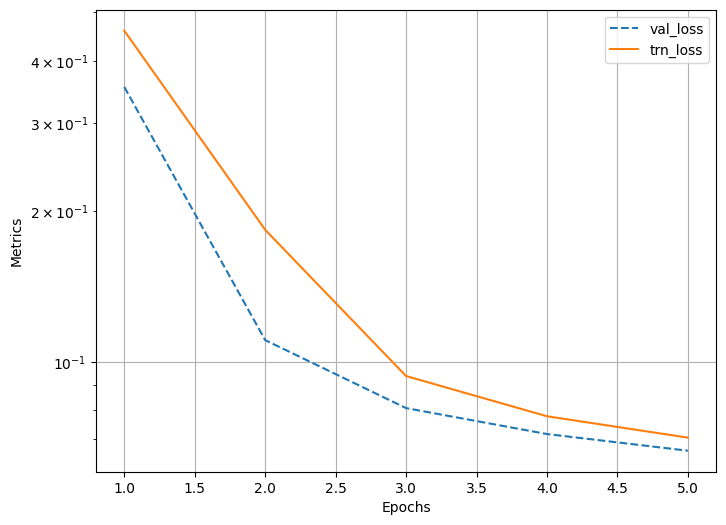

In [7]:
log.plot_epochs(log=True)

tensor([[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000

tensor([[-1.0000, -0.9999, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9989,
         -0.9988, -0.9999, -0.9997, -0.9999, -1.0000, -0.9995, -0.9999, -1.0000,
         -0.9999, -0.9998, -0.9996, -0.9981, -0.9984, -0.9994, -0.9992, -0.9993,
         -0.9996, -0.9990, -0.9999, -0.9998],
        [-0.9999, -1.0000, -1.0000, -1.0000, -1.0000, -0.9997, -1.0000, -0.9985,
         -0.9999, -1.0000, -0.9999, -0.9995, -0.9992, -0.9985, -0.9999, -0.9999,
         -0.9997, -0.9997, -0.9996, -0.9977, -0.9999, -0.9995, -0.9992, -0.9996,
         -0.9999, -0.9998, -1.0000, -1.0000],
        [-1.0000, -0.9998, -1.0000, -1.0000, -1.0000, -0.9987, -1.0000, -0.9908,
         -0.9990, -0.9999, -0.9998, -0.9986, -0.9978, -0.9989, -0.9999, -0.9999,
         -0.9993, -0.9965, -0.9974, -0.9735, -0.9973, -0.9985, -0.9992, -0.9996,
         -0.9999, -0.9997, -1.0000, -1.0000],
        [-1.0000, -0.9999, -1.0000, -1.0000, -1.0000, -0.9999, -0.9999, -0.9997,
         -0.9988, -0.9993, -0.9975, -0.9998, -0.9998

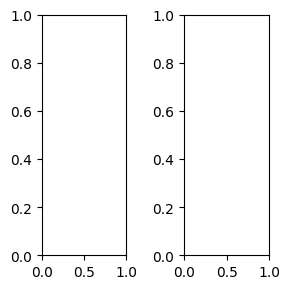

tensor([[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000

tensor([[-1.0000, -0.9999, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9998,
         -0.9998, -0.9999, -0.9997, -0.9999, -1.0000, -0.9998, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -0.9991, -0.9998, -1.0000, -0.9999, -0.9999,
         -1.0000, -0.9996, -1.0000, -1.0000],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9997,
         -1.0000, -1.0000, -0.9999, -0.9990, -0.9996, -0.9998, -1.0000, -1.0000,
         -0.9999, -1.0000, -1.0000, -0.9998, -1.0000, -1.0000, -0.9999, -0.9999,
         -1.0000, -1.0000, -1.0000, -1.0000],
        [-1.0000, -0.9995, -1.0000, -1.0000, -1.0000, -0.9999, -1.0000, -0.9991,
         -0.9999, -1.0000, -0.9999, -0.9976, -0.9987, -0.9994, -1.0000, -0.9998,
         -0.9996, -0.9999, -1.0000, -0.9984, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000],
        [-1.0000, -0.9999, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -0.9999, -1.0000, -1.0000

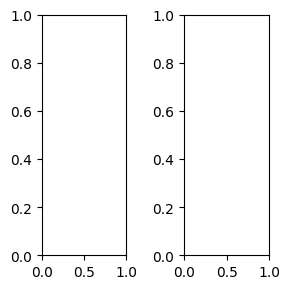

tensor([[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -0.9373, -0.3961

tensor([[-1.0000, -0.9997, -1.0000, -1.0000, -1.0000, -0.9999, -0.9999, -0.9997,
         -0.9998, -0.9999, -0.9999, -0.9999, -0.9999, -0.9958, -0.9980, -0.9970,
         -0.9960, -0.9982, -0.9986, -0.9991, -0.9997, -0.9999, -0.9998, -0.9997,
         -0.9998, -0.9992, -0.9998, -0.9995],
        [-0.9999, -0.9999, -1.0000, -1.0000, -1.0000, -0.9990, -1.0000, -0.9997,
         -1.0000, -1.0000, -1.0000, -0.9992, -0.9933, -0.9968, -0.9975, -0.9944,
         -0.9966, -0.9896, -0.9996, -0.9997, -1.0000, -1.0000, -0.9998, -0.9998,
         -0.9998, -0.9997, -1.0000, -1.0000],
        [-1.0000, -0.9991, -1.0000, -1.0000, -1.0000, -0.9946, -1.0000, -0.9987,
         -0.9999, -1.0000, -0.9999, -0.9960, -0.9740, -0.9751, -0.9736, -0.8672,
         -0.9395, -0.9056, -0.9981, -0.9953, -0.9998, -1.0000, -0.9999, -0.9998,
         -0.9999, -0.9996, -0.9999, -1.0000],
        [-1.0000, -0.9998, -1.0000, -1.0000, -1.0000, -0.9995, -1.0000, -0.9999,
         -0.9996, -0.9993, -0.9935, -0.9868, -0.8346

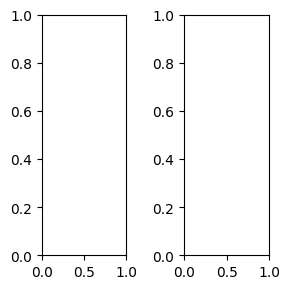

In [8]:
for _ in range(3):
    ix = np.random.randint(len(val_ds))
    im, _ = val_ds[ix]
    _im = model(im[None])[0]
    fig, ax = plt.subplots(1, 2, figsize=(3,3))
    show(im[0], ax=ax[0], title='input')
    show(_im[0], ax=ax[1], title='prediction')
    plt.tight_layout()
    plt.show()

In [9]:
latent_vectors = []
classes = []

In [10]:
for im,clss in val_dl:
    latent_vectors.append(model.encoder(im).view(len(im),-1))
    classes.extend(clss)

In [11]:
latent_vectors = torch.cat(latent_vectors).cpu().detach().numpy()

In [12]:
from sklearn.manifold import TSNE
tsne = TSNE(2)

In [13]:
clustered = tsne.fit_transform(latent_vectors)

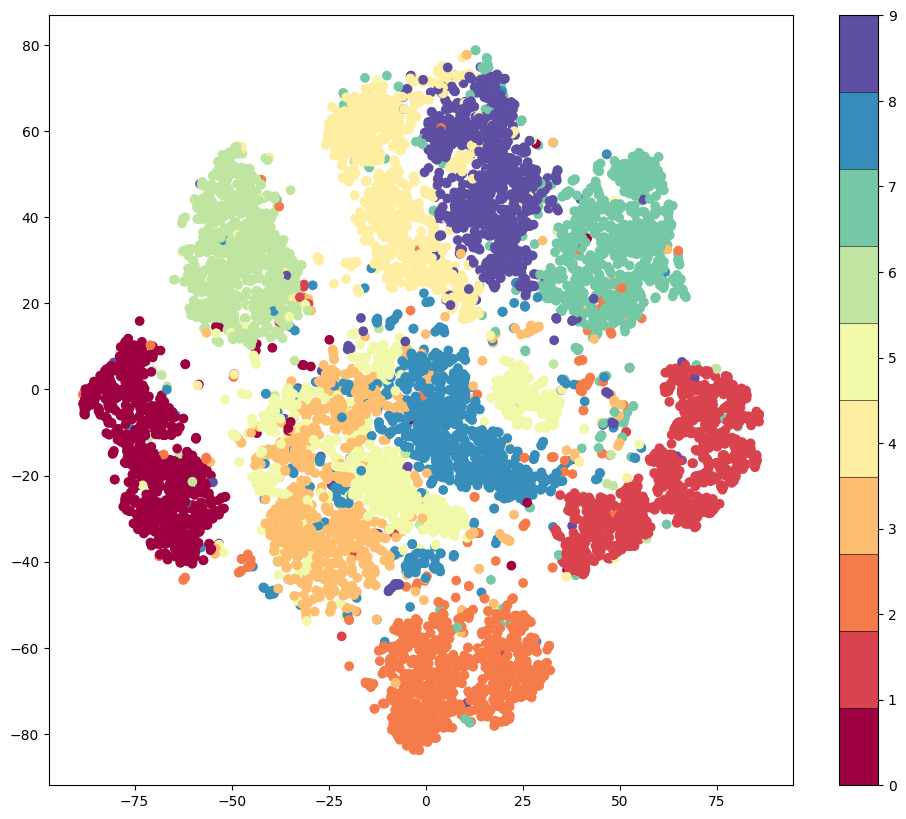

In [14]:
fig = plt.figure(figsize=(12,10))
cmap = plt.get_cmap('Spectral', 10)
plt.scatter(*zip(*clustered), c=classes, cmap=cmap)
plt.colorbar(drawedges=True)

In [15]:
latent_vectors = []
classes = []
for im,clss in val_dl:
    latent_vectors.append(model.encoder(im))
    classes.extend(clss)
latent_vectors = torch.cat(latent_vectors).cpu().detach().numpy().reshape(10000, -1)

In [16]:
rand_vectors = []
for col in latent_vectors.transpose(1,0):
    mu, sigma = col.mean(), col.std()
    rand_vectors.append(sigma*torch.randn(1,100) + mu)

tensor([[-1.0000, -0.9999, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9991,
         -0.9991, -0.9998, -0.9998, -0.9999, -1.0000, -0.9999, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -0.9989, -0.9997, -0.9997, -0.9997, -0.9997,
         -1.0000, -0.9991, -1.0000, -1.0000],
        [-0.9999, -1.0000, -1.0000, -1.0000, -1.0000, -0.9998, -1.0000, -0.9994,
         -1.0000, -1.0000, -1.0000, -0.9996, -0.9997, -0.9997, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -0.9994, -1.0000, -0.9999, -0.9997, -0.9999,
         -1.0000, -1.0000, -1.0000, -1.0000],
        [-1.0000, -0.9992, -1.0000, -1.0000, -1.0000, -0.9996, -1.0000, -0.9983,
         -0.9998, -1.0000, -1.0000, -0.9997, -0.9997, -0.9994, -0.9999, -1.0000,
         -0.9999, -0.9998, -0.9998, -0.9915, -0.9996, -0.9999, -0.9999, -0.9999,
         -1.0000, -0.9999, -1.0000, -1.0000],
        [-1.0000, -0.9999, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9999,
         -0.9999, -1.0000, -1.0000, -1.0000, -1.0000

tensor([[-1.0000, -0.9999, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9999,
         -1.0000, -1.0000, -0.9999, -0.9996, -0.9998, -0.9989, -0.9998, -0.9999,
         -0.9992, -0.9996, -0.9996, -0.9931, -0.9951, -0.9964, -0.9969, -0.9901,
         -0.9963, -0.9931, -0.9997, -0.9994],
        [-0.9999, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9999,
         -1.0000, -1.0000, -0.9999, -0.9988, -0.9991, -0.9997, -1.0000, -0.9999,
         -0.9995, -0.9999, -0.9997, -0.9960, -0.9999, -0.9990, -0.9954, -0.9961,
         -0.9992, -0.9995, -1.0000, -1.0000],
        [-1.0000, -0.9997, -1.0000, -1.0000, -1.0000, -0.9997, -1.0000, -0.9993,
         -1.0000, -1.0000, -0.9998, -0.9953, -0.9965, -0.9988, -0.9999, -0.9996,
         -0.9975, -0.9967, -0.9970, -0.9758, -0.9975, -0.9990, -0.9983, -0.9988,
         -0.9997, -0.9993, -0.9999, -1.0000],
        [-1.0000, -0.9999, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -0.9999, -0.9998, -0.9980, -0.9949, -0.9970

tensor([[-1.0000, -0.9999, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9998,
         -0.9998, -0.9999, -0.9988, -0.9997, -1.0000, -0.9992, -0.9998, -1.0000,
         -0.9999, -0.9999, -1.0000, -0.9986, -0.9997, -0.9998, -0.9998, -0.9997,
         -0.9999, -0.9973, -0.9999, -0.9999],
        [-0.9999, -1.0000, -1.0000, -1.0000, -1.0000, -0.9999, -1.0000, -0.9998,
         -1.0000, -1.0000, -0.9999, -0.9995, -0.9996, -0.9983, -0.9999, -0.9999,
         -0.9997, -1.0000, -1.0000, -0.9994, -1.0000, -1.0000, -0.9997, -0.9993,
         -0.9998, -0.9997, -1.0000, -1.0000],
        [-1.0000, -0.9993, -1.0000, -1.0000, -1.0000, -0.9998, -1.0000, -0.9989,
         -0.9999, -1.0000, -0.9999, -0.9990, -0.9992, -0.9991, -0.9999, -0.9998,
         -0.9989, -0.9998, -1.0000, -0.9960, -0.9998, -1.0000, -0.9999, -0.9997,
         -0.9999, -0.9997, -1.0000, -1.0000],
        [-1.0000, -0.9998, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9997,
         -0.9992, -1.0000, -0.9996, -0.9999, -0.9999

tensor([[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9999, -0.9990,
         -0.9993, -0.9996, -0.9995, -0.9998, -1.0000, -0.9996, -0.9999, -1.0000,
         -0.9999, -0.9999, -1.0000, -0.9992, -0.9997, -0.9999, -0.9999, -0.9999,
         -1.0000, -0.9996, -1.0000, -0.9999],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9994, -0.9999, -0.9990,
         -1.0000, -0.9999, -0.9998, -0.9989, -0.9991, -0.9995, -1.0000, -0.9999,
         -0.9998, -1.0000, -1.0000, -0.9997, -1.0000, -1.0000, -0.9999, -0.9998,
         -0.9999, -0.9999, -1.0000, -1.0000],
        [-1.0000, -0.9998, -1.0000, -1.0000, -1.0000, -0.9958, -1.0000, -0.9932,
         -0.9995, -0.9998, -0.9996, -0.9902, -0.9928, -0.9976, -0.9997, -0.9995,
         -0.9993, -0.9998, -0.9999, -0.9979, -0.9999, -1.0000, -1.0000, -0.9998,
         -0.9999, -0.9998, -1.0000, -1.0000],
        [-1.0000, -0.9999, -1.0000, -1.0000, -1.0000, -0.9989, -0.9995, -0.9996,
         -0.9992, -0.9997, -0.9983, -0.9995, -0.9991

tensor([[-1.0000, -0.9999, -1.0000, -1.0000, -1.0000, -1.0000, -0.9999, -0.9963,
         -0.9943, -0.9993, -0.9994, -0.9997, -0.9999, -0.9986, -0.9991, -0.9998,
         -0.9994, -0.9999, -0.9999, -0.9985, -0.9992, -0.9993, -0.9994, -0.9932,
         -0.9984, -0.9934, -0.9999, -0.9998],
        [-0.9999, -1.0000, -1.0000, -1.0000, -1.0000, -0.9995, -0.9998, -0.9939,
         -0.9994, -0.9997, -0.9997, -0.9980, -0.9986, -0.9959, -0.9993, -0.9993,
         -0.9997, -1.0000, -1.0000, -0.9991, -1.0000, -0.9999, -0.9988, -0.9983,
         -0.9995, -0.9998, -1.0000, -1.0000],
        [-1.0000, -0.9997, -1.0000, -1.0000, -1.0000, -0.9983, -1.0000, -0.9802,
         -0.9947, -0.9970, -0.9977, -0.9829, -0.9886, -0.9948, -0.9980, -0.9983,
         -0.9988, -0.9998, -1.0000, -0.9938, -0.9997, -1.0000, -0.9998, -0.9997,
         -0.9999, -0.9997, -1.0000, -1.0000],
        [-1.0000, -0.9998, -1.0000, -1.0000, -1.0000, -0.9994, -0.9983, -0.9829,
         -0.9755, -0.9905, -0.9914, -0.9967, -0.9948

tensor([[-1.0000, -0.9999, -1.0000, -1.0000, -1.0000, -0.9999, -0.9995, -0.9979,
         -0.9984, -0.9997, -0.9995, -0.9998, -1.0000, -0.9968, -0.9989, -0.9996,
         -0.9997, -0.9998, -0.9998, -0.9971, -0.9975, -0.9973, -0.9985, -0.9936,
         -0.9985, -0.9960, -0.9999, -0.9997],
        [-0.9999, -0.9999, -1.0000, -1.0000, -1.0000, -0.9874, -0.9987, -0.9985,
         -0.9999, -1.0000, -0.9999, -0.9993, -0.9966, -0.9927, -0.9979, -0.9989,
         -0.9990, -0.9996, -0.9999, -0.9976, -0.9999, -0.9989, -0.9970, -0.9986,
         -0.9997, -0.9997, -1.0000, -1.0000],
        [-1.0000, -0.9996, -1.0000, -1.0000, -1.0000, -0.9538, -0.9997, -0.9907,
         -0.9990, -0.9999, -0.9999, -0.9969, -0.9883, -0.9852, -0.9907, -0.9780,
         -0.9793, -0.9951, -0.9997, -0.9706, -0.9974, -0.9978, -0.9984, -0.9994,
         -0.9998, -0.9992, -1.0000, -1.0000],
        [-1.0000, -0.9998, -1.0000, -1.0000, -0.9999, -0.9950, -0.9969, -0.9958,
         -0.9961, -0.9995, -0.9985, -0.9995, -0.9967

tensor([[-1.0000e+00, -9.9997e-01, -1.0000e+00, -1.0000e+00, -1.0000e+00,
         -9.9993e-01, -9.9972e-01, -9.9918e-01, -9.9954e-01, -9.9993e-01,
         -9.9983e-01, -9.9959e-01, -9.9987e-01, -9.9647e-01, -9.9925e-01,
         -9.9975e-01, -9.9954e-01, -9.9986e-01, -9.9989e-01, -9.9845e-01,
         -9.9878e-01, -9.9937e-01, -9.9917e-01, -9.9742e-01, -9.9901e-01,
         -9.9607e-01, -9.9987e-01, -9.9954e-01],
        [-9.9999e-01, -9.9999e-01, -1.0000e+00, -1.0000e+00, -1.0000e+00,
         -9.9767e-01, -9.9988e-01, -9.9899e-01, -9.9997e-01, -9.9998e-01,
         -9.9992e-01, -9.9890e-01, -9.9602e-01, -9.8792e-01, -9.9963e-01,
         -9.9921e-01, -9.9928e-01, -9.9991e-01, -9.9995e-01, -9.9764e-01,
         -9.9992e-01, -9.9965e-01, -9.9929e-01, -9.9855e-01, -9.9965e-01,
         -9.9972e-01, -1.0000e+00, -9.9998e-01],
        [-1.0000e+00, -9.9991e-01, -1.0000e+00, -1.0000e+00, -1.0000e+00,
         -9.8033e-01, -9.9997e-01, -9.8780e-01, -9.9925e-01, -9.9992e-01,
         -9.99

tensor([[-1.0000, -0.9995, -1.0000, -1.0000, -1.0000, -0.9999, -0.9998, -0.9995,
         -0.9996, -0.9998, -0.9993, -0.9992, -0.9995, -0.9920, -0.9967, -0.9988,
         -0.9978, -0.9987, -0.9993, -0.9993, -0.9998, -0.9999, -0.9997, -0.9995,
         -0.9997, -0.9944, -0.9996, -0.9994],
        [-0.9997, -0.9998, -1.0000, -1.0000, -1.0000, -0.9988, -0.9999, -0.9996,
         -1.0000, -1.0000, -0.9998, -0.9985, -0.9944, -0.9955, -0.9994, -0.9963,
         -0.9937, -0.9960, -0.9998, -0.9997, -1.0000, -1.0000, -0.9997, -0.9996,
         -0.9997, -0.9995, -1.0000, -0.9999],
        [-1.0000, -0.9979, -0.9999, -1.0000, -1.0000, -0.9942, -1.0000, -0.9972,
         -0.9998, -1.0000, -0.9997, -0.9957, -0.9868, -0.9940, -0.9981, -0.9745,
         -0.9708, -0.9763, -0.9996, -0.9947, -0.9998, -0.9999, -0.9998, -0.9997,
         -0.9998, -0.9992, -0.9999, -1.0000],
        [-1.0000, -0.9996, -1.0000, -1.0000, -1.0000, -0.9994, -0.9999, -0.9993,
         -0.9984, -0.9986, -0.9920, -0.9947, -0.9794

tensor([[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9998,
         -0.9998, -0.9999, -0.9999, -0.9998, -0.9999, -0.9992, -0.9998, -0.9998,
         -0.9984, -0.9998, -0.9999, -0.9996, -0.9999, -1.0000, -1.0000, -1.0000,
         -1.0000, -0.9995, -0.9999, -0.9997],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9999, -1.0000, -0.9996,
         -1.0000, -1.0000, -0.9998, -0.9991, -0.9984, -0.9992, -1.0000, -0.9997,
         -0.9996, -1.0000, -1.0000, -0.9999, -1.0000, -1.0000, -1.0000, -0.9999,
         -0.9999, -0.9998, -1.0000, -1.0000],
        [-1.0000, -0.9999, -1.0000, -1.0000, -1.0000, -0.9995, -1.0000, -0.9969,
         -0.9998, -1.0000, -0.9998, -0.9958, -0.9925, -0.9976, -0.9996, -0.9999,
         -0.9998, -0.9999, -1.0000, -0.9993, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -0.9998, -0.9999, -1.0000],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9994, -0.9999, -0.9996,
         -0.9995, -0.9990, -0.9964, -0.9950, -0.9937

tensor([[-1.0000, -0.9997, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9999,
         -0.9999, -0.9999, -0.9994, -0.9989, -0.9999, -0.9987, -0.9998, -1.0000,
         -0.9999, -0.9999, -1.0000, -0.9991, -0.9998, -0.9999, -0.9997, -0.9995,
         -0.9999, -0.9993, -1.0000, -0.9998],
        [-0.9998, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9999,
         -1.0000, -1.0000, -0.9993, -0.9910, -0.9981, -0.9992, -1.0000, -0.9999,
         -0.9998, -1.0000, -1.0000, -0.9997, -1.0000, -1.0000, -0.9996, -0.9997,
         -0.9999, -0.9999, -1.0000, -1.0000],
        [-1.0000, -0.9991, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9997,
         -1.0000, -0.9999, -0.9991, -0.9852, -0.9944, -0.9981, -0.9999, -0.9998,
         -0.9997, -1.0000, -1.0000, -0.9972, -0.9998, -0.9999, -0.9996, -0.9995,
         -0.9999, -0.9996, -1.0000, -1.0000],
        [-1.0000, -0.9998, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9999,
         -0.9998, -1.0000, -0.9994, -0.9987, -0.9993

tensor([[-1.0000e+00, -9.9992e-01, -1.0000e+00, -1.0000e+00, -1.0000e+00,
         -9.9996e-01, -9.9994e-01, -9.9927e-01, -9.9958e-01, -9.9984e-01,
         -9.9960e-01, -9.9985e-01, -9.9996e-01, -9.9916e-01, -9.9968e-01,
         -9.9990e-01, -9.9970e-01, -9.9916e-01, -9.9876e-01, -9.7769e-01,
         -9.9106e-01, -9.9817e-01, -9.9927e-01, -9.9941e-01, -9.9968e-01,
         -9.9907e-01, -9.9991e-01, -9.9949e-01],
        [-9.9995e-01, -9.9997e-01, -1.0000e+00, -1.0000e+00, -1.0000e+00,
         -9.9908e-01, -9.9996e-01, -9.9914e-01, -9.9998e-01, -9.9999e-01,
         -9.9998e-01, -9.9954e-01, -9.9841e-01, -9.9882e-01, -9.9988e-01,
         -9.9992e-01, -9.9948e-01, -9.9838e-01, -9.9838e-01, -9.7926e-01,
         -9.9930e-01, -9.9865e-01, -9.9901e-01, -9.9902e-01, -9.9977e-01,
         -9.9975e-01, -9.9999e-01, -9.9998e-01],
        [-1.0000e+00, -9.9958e-01, -9.9998e-01, -1.0000e+00, -1.0000e+00,
         -9.9760e-01, -1.0000e+00, -9.9286e-01, -9.9957e-01, -9.9999e-01,
         -9.99

tensor([[-1.0000, -0.9998, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9989,
         -0.9968, -0.9990, -0.9981, -0.9983, -0.9998, -0.9988, -0.9998, -0.9998,
         -0.9996, -0.9999, -1.0000, -0.9989, -0.9993, -0.9991, -0.9992, -0.9981,
         -0.9992, -0.9983, -0.9999, -0.9997],
        [-0.9999, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9981,
         -0.9998, -0.9997, -0.9947, -0.9901, -0.9963, -0.9985, -0.9999, -0.9996,
         -0.9998, -1.0000, -1.0000, -0.9988, -1.0000, -0.9998, -0.9987, -0.9981,
         -0.9996, -0.9998, -1.0000, -1.0000],
        [-1.0000, -0.9995, -1.0000, -1.0000, -1.0000, -0.9998, -1.0000, -0.9923,
         -0.9981, -0.9872, -0.9511, -0.9511, -0.9766, -0.9908, -0.9987, -0.9984,
         -0.9988, -0.9999, -1.0000, -0.9927, -0.9994, -0.9998, -0.9995, -0.9979,
         -0.9995, -0.9995, -1.0000, -1.0000],
        [-1.0000, -0.9999, -1.0000, -1.0000, -0.9999, -0.9975, -0.9932, -0.6943,
         -0.5574,  0.4037,  0.4264, -0.4234, -0.9311

tensor([[-1.0000, -0.9999, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9999,
         -0.9998, -1.0000, -0.9998, -0.9993, -0.9996, -0.9973, -0.9994, -0.9998,
         -0.9991, -0.9999, -1.0000, -0.9998, -0.9999, -0.9999, -0.9997, -0.9979,
         -0.9993, -0.9962, -0.9999, -0.9999],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9998,
         -1.0000, -1.0000, -0.9998, -0.9980, -0.9967, -0.9976, -0.9999, -0.9994,
         -0.9999, -1.0000, -1.0000, -0.9999, -1.0000, -1.0000, -0.9995, -0.9989,
         -0.9996, -0.9999, -1.0000, -1.0000],
        [-1.0000, -0.9998, -1.0000, -1.0000, -1.0000, -0.9998, -1.0000, -0.9984,
         -0.9998, -0.9999, -0.9996, -0.9922, -0.9874, -0.9941, -0.9996, -0.9996,
         -0.9999, -1.0000, -1.0000, -0.9992, -1.0000, -1.0000, -1.0000, -0.9996,
         -0.9998, -0.9994, -1.0000, -1.0000],
        [-1.0000, -0.9999, -0.9999, -1.0000, -0.9999, -0.9996, -0.9999, -0.9987,
         -0.9984, -0.9992, -0.9970, -0.9899, -0.9928

tensor([[-1.0000, -0.9999, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9997,
         -0.9997, -0.9999, -0.9997, -0.9998, -1.0000, -0.9998, -1.0000, -1.0000,
         -0.9999, -0.9998, -0.9998, -0.9986, -0.9992, -0.9996, -0.9995, -0.9995,
         -0.9999, -0.9997, -1.0000, -0.9998],
        [-0.9999, -1.0000, -1.0000, -1.0000, -1.0000, -0.9997, -1.0000, -0.9996,
         -1.0000, -1.0000, -0.9998, -0.9991, -0.9997, -0.9998, -1.0000, -1.0000,
         -0.9998, -1.0000, -0.9998, -0.9991, -1.0000, -0.9999, -0.9997, -0.9999,
         -1.0000, -0.9999, -1.0000, -1.0000],
        [-1.0000, -0.9998, -1.0000, -1.0000, -1.0000, -0.9981, -1.0000, -0.9972,
         -0.9997, -0.9998, -0.9995, -0.9968, -0.9985, -0.9994, -0.9999, -1.0000,
         -0.9998, -0.9997, -0.9990, -0.9919, -0.9992, -0.9997, -0.9997, -0.9998,
         -1.0000, -0.9998, -1.0000, -1.0000],
        [-1.0000, -0.9999, -1.0000, -1.0000, -1.0000, -0.9999, -1.0000, -0.9994,
         -0.9990, -0.9994, -0.9976, -0.9993, -0.9998

tensor([[-1.0000, -0.9999, -1.0000, -1.0000, -1.0000, -0.9999, -0.9999, -0.9985,
         -0.9989, -0.9998, -0.9994, -0.9997, -1.0000, -0.9967, -0.9993, -0.9999,
         -0.9998, -0.9999, -0.9998, -0.9958, -0.9937, -0.9928, -0.9969, -0.9909,
         -0.9983, -0.9986, -1.0000, -0.9999],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9979, -0.9999, -0.9986,
         -1.0000, -1.0000, -1.0000, -0.9987, -0.9966, -0.9921, -0.9997, -0.9998,
         -0.9997, -0.9997, -0.9997, -0.9927, -0.9996, -0.9940, -0.9932, -0.9962,
         -0.9998, -0.9999, -1.0000, -1.0000],
        [-1.0000, -0.9995, -1.0000, -1.0000, -1.0000, -0.9944, -1.0000, -0.9948,
         -0.9996, -1.0000, -1.0000, -0.9956, -0.9893, -0.9908, -0.9993, -0.9988,
         -0.9975, -0.9967, -0.9988, -0.9476, -0.9912, -0.9901, -0.9977, -0.9971,
         -0.9998, -0.9996, -1.0000, -1.0000],
        [-1.0000, -0.9997, -1.0000, -1.0000, -1.0000, -0.9998, -1.0000, -0.9999,
         -0.9999, -1.0000, -0.9998, -0.9999, -0.9994

tensor([[-1.0000, -0.9999, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9998,
         -0.9999, -0.9999, -0.9999, -0.9999, -1.0000, -0.9996, -1.0000, -1.0000,
         -1.0000, -0.9999, -0.9998, -0.9989, -0.9994, -0.9996, -0.9991, -0.9989,
         -0.9994, -0.9985, -0.9999, -0.9997],
        [-0.9999, -1.0000, -1.0000, -1.0000, -1.0000, -0.9999, -1.0000, -0.9997,
         -1.0000, -1.0000, -0.9999, -0.9994, -0.9990, -0.9997, -1.0000, -1.0000,
         -0.9998, -0.9998, -0.9997, -0.9991, -1.0000, -0.9999, -0.9993, -0.9995,
         -0.9999, -0.9997, -1.0000, -1.0000],
        [-1.0000, -0.9997, -1.0000, -1.0000, -1.0000, -0.9994, -1.0000, -0.9985,
         -0.9999, -1.0000, -1.0000, -0.9990, -0.9980, -0.9993, -0.9999, -0.9999,
         -0.9992, -0.9964, -0.9968, -0.9870, -0.9990, -0.9997, -0.9995, -0.9994,
         -0.9999, -0.9995, -1.0000, -1.0000],
        [-1.0000, -0.9999, -1.0000, -1.0000, -1.0000, -0.9996, -1.0000, -1.0000,
         -1.0000, -1.0000, -0.9996, -0.9999, -0.9998

tensor([[-1.0000, -0.9998, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9999,
         -0.9999, -1.0000, -0.9998, -0.9999, -1.0000, -0.9988, -0.9994, -0.9998,
         -0.9996, -0.9998, -0.9998, -0.9982, -0.9991, -0.9993, -0.9986, -0.9978,
         -0.9989, -0.9970, -0.9998, -0.9991],
        [-0.9999, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9999,
         -1.0000, -1.0000, -0.9998, -0.9995, -0.9994, -0.9988, -0.9999, -0.9996,
         -0.9987, -0.9999, -0.9999, -0.9985, -1.0000, -0.9998, -0.9992, -0.9988,
         -0.9997, -0.9996, -1.0000, -1.0000],
        [-1.0000, -0.9996, -1.0000, -1.0000, -1.0000, -0.9998, -1.0000, -0.9991,
         -0.9999, -0.9998, -0.9987, -0.9950, -0.9954, -0.9961, -0.9992, -0.9954,
         -0.9898, -0.9983, -0.9997, -0.9860, -0.9988, -0.9997, -0.9996, -0.9989,
         -0.9997, -0.9991, -0.9999, -1.0000],
        [-1.0000, -0.9999, -1.0000, -1.0000, -1.0000, -0.9999, -0.9998, -0.9936,
         -0.9898, -0.9976, -0.9871, -0.9971, -0.9957

tensor([[-1.0000, -0.9998, -1.0000, -1.0000, -1.0000, -0.9999, -1.0000, -0.9993,
         -0.9995, -0.9997, -0.9992, -0.9996, -0.9999, -0.9992, -0.9999, -0.9999,
         -0.9998, -0.9999, -0.9999, -0.9942, -0.9980, -0.9992, -0.9991, -0.9984,
         -0.9992, -0.9975, -0.9999, -0.9995],
        [-0.9999, -1.0000, -1.0000, -1.0000, -1.0000, -0.9998, -1.0000, -0.9994,
         -1.0000, -1.0000, -0.9997, -0.9972, -0.9983, -0.9989, -1.0000, -0.9998,
         -0.9994, -0.9999, -0.9999, -0.9971, -0.9999, -0.9997, -0.9994, -0.9989,
         -0.9996, -0.9997, -1.0000, -1.0000],
        [-1.0000, -0.9993, -1.0000, -1.0000, -1.0000, -0.9996, -1.0000, -0.9973,
         -0.9998, -0.9999, -0.9994, -0.9882, -0.9925, -0.9975, -0.9998, -0.9994,
         -0.9975, -0.9984, -0.9993, -0.9831, -0.9991, -0.9998, -0.9998, -0.9995,
         -0.9998, -0.9995, -1.0000, -1.0000],
        [-1.0000, -0.9998, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9999,
         -0.9999, -0.9997, -0.9965, -0.9984, -0.9987

tensor([[-1.0000, -0.9997, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9999,
         -1.0000, -1.0000, -0.9999, -0.9999, -1.0000, -0.9993, -0.9999, -1.0000,
         -0.9999, -0.9998, -0.9997, -0.9986, -0.9982, -0.9982, -0.9984, -0.9977,
         -0.9995, -0.9978, -0.9999, -0.9998],
        [-0.9997, -0.9999, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9999,
         -1.0000, -1.0000, -1.0000, -0.9995, -0.9993, -0.9987, -1.0000, -0.9999,
         -0.9998, -0.9999, -0.9998, -0.9970, -0.9999, -0.9991, -0.9968, -0.9991,
         -0.9999, -0.9999, -1.0000, -1.0000],
        [-1.0000, -0.9992, -1.0000, -1.0000, -1.0000, -0.9998, -1.0000, -0.9993,
         -1.0000, -1.0000, -0.9999, -0.9989, -0.9984, -0.9985, -0.9999, -0.9999,
         -0.9994, -0.9992, -0.9993, -0.9732, -0.9965, -0.9974, -0.9983, -0.9993,
         -0.9999, -0.9996, -1.0000, -1.0000],
        [-1.0000, -0.9999, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9998,
         -0.9995, -0.9999, -0.9994, -0.9999, -0.9998

tensor([[-1.0000, -0.9999, -1.0000, -1.0000, -1.0000, -1.0000, -0.9999, -0.9930,
         -0.9940, -0.9987, -0.9991, -0.9999, -1.0000, -0.9982, -0.9994, -0.9998,
         -0.9998, -1.0000, -1.0000, -0.9991, -0.9998, -0.9999, -0.9999, -0.9999,
         -0.9999, -0.9994, -1.0000, -0.9999],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9994, -0.9996, -0.9961,
         -0.9998, -0.9999, -0.9999, -0.9990, -0.9975, -0.9917, -0.9989, -0.9991,
         -0.9997, -1.0000, -1.0000, -0.9998, -1.0000, -1.0000, -0.9998, -0.9998,
         -0.9999, -0.9999, -1.0000, -1.0000],
        [-1.0000, -0.9997, -1.0000, -1.0000, -1.0000, -0.9974, -0.9999, -0.9861,
         -0.9979, -0.9996, -0.9995, -0.9958, -0.9909, -0.9870, -0.9958, -0.9950,
         -0.9971, -0.9995, -1.0000, -0.9976, -0.9999, -1.0000, -0.9999, -0.9997,
         -0.9999, -0.9996, -1.0000, -1.0000],
        [-1.0000, -0.9999, -1.0000, -1.0000, -1.0000, -0.9989, -0.9950, -0.9923,
         -0.9865, -0.9978, -0.9976, -0.9997, -0.9992

tensor([[-1.0000, -0.9999, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9995,
         -0.9994, -0.9999, -0.9997, -0.9998, -1.0000, -0.9971, -0.9993, -0.9996,
         -0.9994, -0.9998, -0.9998, -0.9939, -0.9969, -0.9990, -0.9993, -0.9984,
         -0.9993, -0.9991, -0.9999, -0.9998],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9997,
         -1.0000, -1.0000, -0.9999, -0.9988, -0.9948, -0.9903, -0.9994, -0.9995,
         -0.9995, -0.9998, -0.9999, -0.9955, -0.9999, -0.9994, -0.9990, -0.9988,
         -0.9997, -0.9998, -1.0000, -1.0000],
        [-1.0000, -0.9992, -1.0000, -1.0000, -1.0000, -0.9999, -1.0000, -0.9993,
         -0.9999, -1.0000, -1.0000, -0.9977, -0.9908, -0.9895, -0.9984, -0.9982,
         -0.9968, -0.9979, -0.9994, -0.9627, -0.9972, -0.9993, -0.9996, -0.9987,
         -0.9996, -0.9996, -1.0000, -1.0000],
        [-1.0000, -0.9999, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9999,
         -0.9998, -1.0000, -0.9998, -0.9997, -0.9980

tensor([[-1.0000, -0.9999, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -0.9999, -0.9999, -0.9980, -0.9987, -0.9992,
         -0.9979, -0.9994, -0.9997, -0.9980, -0.9995, -0.9998, -0.9997, -0.9996,
         -0.9997, -0.9973, -0.9997, -0.9994],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9999,
         -1.0000, -1.0000, -1.0000, -0.9992, -0.9969, -0.9980, -0.9997, -0.9989,
         -0.9994, -0.9998, -1.0000, -0.9994, -1.0000, -0.9999, -0.9997, -0.9996,
         -0.9996, -0.9994, -1.0000, -0.9999],
        [-1.0000, -0.9996, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9996,
         -1.0000, -1.0000, -0.9999, -0.9932, -0.9767, -0.9929, -0.9980, -0.9948,
         -0.9974, -0.9984, -0.9999, -0.9960, -0.9998, -0.9999, -0.9998, -0.9994,
         -0.9996, -0.9987, -0.9998, -1.0000],
        [-1.0000, -0.9999, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9999,
         -0.9998, -0.9999, -0.9988, -0.9926, -0.9557

tensor([[-1.0000, -0.9999, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9964,
         -0.9926, -0.9977, -0.9978, -0.9992, -0.9999, -0.9994, -0.9999, -0.9999,
         -0.9999, -0.9999, -0.9999, -0.9935, -0.9934, -0.9957, -0.9980, -0.9958,
         -0.9987, -0.9978, -0.9999, -0.9998],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9999, -0.9999, -0.9939,
         -0.9995, -0.9997, -0.9992, -0.9928, -0.9963, -0.9969, -0.9999, -0.9999,
         -0.9998, -0.9999, -0.9998, -0.9915, -0.9996, -0.9966, -0.9968, -0.9986,
         -0.9998, -0.9998, -1.0000, -1.0000],
        [-1.0000, -0.9995, -1.0000, -1.0000, -1.0000, -0.9989, -1.0000, -0.9864,
         -0.9972, -0.9992, -0.9983, -0.9800, -0.9861, -0.9913, -0.9994, -0.9990,
         -0.9975, -0.9970, -0.9967, -0.9283, -0.9912, -0.9920, -0.9979, -0.9987,
         -0.9997, -0.9996, -1.0000, -1.0000],
        [-1.0000, -0.9999, -1.0000, -1.0000, -1.0000, -0.9998, -0.9996, -0.9961,
         -0.9857, -0.9951, -0.9860, -0.9984, -0.9994

tensor([[-1.0000, -0.9999, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9999,
         -0.9998, -1.0000, -0.9999, -0.9999, -1.0000, -0.9986, -0.9997, -0.9999,
         -0.9998, -0.9999, -0.9999, -0.9994, -0.9999, -1.0000, -0.9999, -1.0000,
         -1.0000, -0.9997, -1.0000, -0.9999],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9998,
         -1.0000, -1.0000, -0.9999, -0.9993, -0.9989, -0.9984, -1.0000, -0.9998,
         -0.9999, -1.0000, -1.0000, -0.9998, -1.0000, -1.0000, -0.9999, -0.9999,
         -1.0000, -0.9999, -1.0000, -1.0000],
        [-1.0000, -0.9998, -1.0000, -1.0000, -1.0000, -0.9998, -1.0000, -0.9988,
         -0.9999, -1.0000, -0.9999, -0.9976, -0.9960, -0.9979, -0.9999, -0.9998,
         -0.9998, -0.9998, -1.0000, -0.9952, -0.9998, -1.0000, -1.0000, -0.9999,
         -1.0000, -0.9999, -1.0000, -1.0000],
        [-1.0000, -0.9999, -1.0000, -1.0000, -1.0000, -0.9999, -0.9999, -0.9995,
         -0.9991, -0.9996, -0.9989, -0.9994, -0.9993

tensor([[-1.0000, -0.9998, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9999,
         -0.9999, -1.0000, -0.9999, -0.9999, -1.0000, -0.9968, -0.9985, -0.9991,
         -0.9993, -0.9995, -0.9995, -0.9945, -0.9962, -0.9975, -0.9975, -0.9941,
         -0.9968, -0.9947, -0.9996, -0.9987],
        [-0.9999, -0.9999, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9999,
         -1.0000, -1.0000, -1.0000, -0.9994, -0.9967, -0.9963, -0.9988, -0.9987,
         -0.9979, -0.9991, -0.9995, -0.9952, -0.9998, -0.9991, -0.9972, -0.9966,
         -0.9989, -0.9993, -1.0000, -0.9999],
        [-1.0000, -0.9992, -1.0000, -1.0000, -1.0000, -0.9999, -1.0000, -0.9997,
         -1.0000, -1.0000, -1.0000, -0.9976, -0.9893, -0.9818, -0.9896, -0.9633,
         -0.9572, -0.9839, -0.9977, -0.9688, -0.9961, -0.9985, -0.9980, -0.9960,
         -0.9987, -0.9980, -0.9998, -1.0000],
        [-1.0000, -0.9998, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9999,
         -0.9998, -1.0000, -0.9996, -0.9997, -0.9970

tensor([[-1.0000e+00, -9.9996e-01, -1.0000e+00, -1.0000e+00, -1.0000e+00,
         -9.9999e-01, -1.0000e+00, -9.9992e-01, -9.9995e-01, -9.9999e-01,
         -9.9998e-01, -9.9996e-01, -9.9999e-01, -9.9978e-01, -9.9995e-01,
         -9.9997e-01, -9.9984e-01, -9.9983e-01, -9.9977e-01, -9.9728e-01,
         -9.9865e-01, -9.9884e-01, -9.9898e-01, -9.9848e-01, -9.9956e-01,
         -9.9886e-01, -9.9997e-01, -9.9981e-01],
        [-9.9997e-01, -9.9999e-01, -1.0000e+00, -1.0000e+00, -1.0000e+00,
         -9.9998e-01, -1.0000e+00, -9.9991e-01, -1.0000e+00, -1.0000e+00,
         -9.9999e-01, -9.9952e-01, -9.9937e-01, -9.9954e-01, -9.9999e-01,
         -9.9996e-01, -9.9986e-01, -9.9991e-01, -9.9986e-01, -9.9814e-01,
         -9.9995e-01, -9.9932e-01, -9.9830e-01, -9.9910e-01, -9.9987e-01,
         -9.9988e-01, -1.0000e+00, -9.9999e-01],
        [-1.0000e+00, -9.9973e-01, -9.9999e-01, -1.0000e+00, -1.0000e+00,
         -9.9991e-01, -1.0000e+00, -9.9934e-01, -9.9996e-01, -1.0000e+00,
         -9.99

tensor([[-1.0000e+00, -9.9974e-01, -1.0000e+00, -1.0000e+00, -9.9999e-01,
         -9.9996e-01, -9.9993e-01, -9.9434e-01, -9.9015e-01, -9.9828e-01,
         -9.9836e-01, -9.9920e-01, -9.9988e-01, -9.9943e-01, -9.9989e-01,
         -9.9995e-01, -9.9968e-01, -9.9943e-01, -9.9960e-01, -9.9298e-01,
         -9.9864e-01, -9.9978e-01, -9.9973e-01, -9.9979e-01, -9.9986e-01,
         -9.9934e-01, -9.9992e-01, -9.9972e-01],
        [-9.9974e-01, -9.9995e-01, -1.0000e+00, -1.0000e+00, -1.0000e+00,
         -9.9978e-01, -9.9989e-01, -9.9131e-01, -9.9907e-01, -9.9945e-01,
         -9.9952e-01, -9.9827e-01, -9.9938e-01, -9.9949e-01, -9.9997e-01,
         -9.9994e-01, -9.9936e-01, -9.9986e-01, -9.9965e-01, -9.9701e-01,
         -9.9994e-01, -9.9980e-01, -9.9959e-01, -9.9937e-01, -9.9984e-01,
         -9.9977e-01, -9.9999e-01, -9.9998e-01],
        [-1.0000e+00, -9.9912e-01, -9.9997e-01, -1.0000e+00, -1.0000e+00,
         -9.9944e-01, -9.9999e-01, -9.8029e-01, -9.9490e-01, -9.9871e-01,
         -9.99

tensor([[-1.0000, -0.9999, -1.0000, -1.0000, -1.0000, -1.0000, -0.9999, -0.9965,
         -0.9956, -0.9989, -0.9992, -0.9999, -1.0000, -0.9998, -0.9999, -1.0000,
         -0.9999, -1.0000, -1.0000, -0.9992, -0.9999, -1.0000, -0.9999, -1.0000,
         -1.0000, -0.9996, -0.9999, -0.9998],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9995, -0.9998, -0.9977,
         -0.9999, -0.9999, -0.9999, -0.9996, -0.9997, -0.9996, -1.0000, -0.9999,
         -0.9997, -0.9999, -1.0000, -0.9998, -1.0000, -1.0000, -0.9999, -0.9999,
         -0.9999, -0.9999, -1.0000, -1.0000],
        [-1.0000, -0.9996, -1.0000, -1.0000, -1.0000, -0.9980, -1.0000, -0.9950,
         -0.9993, -0.9999, -0.9999, -0.9987, -0.9989, -0.9994, -0.9998, -0.9990,
         -0.9974, -0.9989, -0.9999, -0.9985, -0.9999, -1.0000, -1.0000, -0.9999,
         -0.9999, -0.9998, -1.0000, -1.0000],
        [-1.0000, -0.9999, -1.0000, -1.0000, -1.0000, -0.9992, -0.9997, -0.9991,
         -0.9992, -0.9997, -0.9997, -1.0000, -0.9999

tensor([[-1.0000, -0.9999, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -0.9999, -0.9999, -1.0000, -0.9995, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -0.9999, -1.0000, -1.0000, -0.9999, -0.9998,
         -0.9999, -0.9995, -1.0000, -0.9999],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9999,
         -1.0000, -1.0000, -1.0000, -0.9998, -0.9996, -0.9991, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -0.9999, -1.0000, -1.0000, -0.9998, -0.9999,
         -1.0000, -0.9999, -1.0000, -1.0000],
        [-1.0000, -0.9997, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9995,
         -1.0000, -1.0000, -1.0000, -0.9999, -0.9997, -0.9992, -1.0000, -1.0000,
         -0.9999, -0.9998, -0.9999, -0.9980, -0.9999, -0.9999, -0.9998, -0.9996,
         -0.9999, -0.9998, -1.0000, -1.0000],
        [-1.0000, -0.9999, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -0.9999, -1.0000, -1.0000

tensor([[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -0.9999, -0.9999, -1.0000, -0.9998, -1.0000, -0.9999,
         -0.9999, -0.9999, -0.9999, -0.9964, -0.9989, -0.9995, -0.9997, -0.9996,
         -0.9999, -0.9990, -1.0000, -0.9999],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -0.9994, -0.9987, -0.9995, -1.0000, -0.9999,
         -0.9999, -0.9999, -0.9999, -0.9987, -1.0000, -0.9999, -0.9998, -0.9995,
         -0.9999, -0.9999, -1.0000, -1.0000],
        [-1.0000, -0.9999, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9997,
         -1.0000, -1.0000, -1.0000, -0.9981, -0.9956, -0.9985, -0.9997, -0.9997,
         -0.9994, -0.9992, -0.9997, -0.9956, -0.9997, -1.0000, -1.0000, -0.9999,
         -1.0000, -0.9999, -1.0000, -1.0000],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -0.9999, -0.9999, -0.9993

tensor([[-1.0000, -0.9998, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -0.9999, -0.9998, -0.9999, -0.9991, -0.9996, -0.9999,
         -0.9992, -0.9999, -0.9999, -0.9998, -1.0000, -0.9999, -0.9998, -0.9990,
         -0.9994, -0.9977, -0.9999, -0.9998],
        [-0.9999, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -0.9999, -0.9995, -0.9994, -0.9993, -1.0000, -0.9999,
         -0.9999, -1.0000, -1.0000, -0.9999, -1.0000, -1.0000, -0.9998, -0.9995,
         -0.9998, -0.9999, -1.0000, -1.0000],
        [-1.0000, -0.9996, -1.0000, -1.0000, -1.0000, -0.9997, -1.0000, -0.9994,
         -1.0000, -1.0000, -0.9998, -0.9963, -0.9963, -0.9988, -0.9999, -0.9994,
         -0.9996, -0.9998, -1.0000, -0.9988, -1.0000, -1.0000, -0.9999, -0.9997,
         -0.9998, -0.9997, -1.0000, -1.0000],
        [-1.0000, -0.9999, -1.0000, -1.0000, -1.0000, -0.9999, -1.0000, -0.9998,
         -0.9997, -0.9988, -0.9940, -0.9900, -0.9843

tensor([[-1.0000, -0.9999, -1.0000, -1.0000, -1.0000, -0.9999, -0.9999, -0.9988,
         -0.9992, -0.9997, -0.9995, -0.9998, -1.0000, -0.9977, -0.9995, -0.9992,
         -0.9990, -0.9992, -0.9991, -0.9945, -0.9967, -0.9985, -0.9992, -0.9970,
         -0.9991, -0.9978, -0.9999, -0.9998],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9981, -0.9999, -0.9986,
         -1.0000, -1.0000, -1.0000, -0.9988, -0.9938, -0.9946, -0.9977, -0.9987,
         -0.9986, -0.9974, -0.9991, -0.9971, -0.9999, -0.9995, -0.9990, -0.9990,
         -0.9997, -0.9998, -1.0000, -1.0000],
        [-1.0000, -0.9996, -1.0000, -1.0000, -1.0000, -0.9942, -1.0000, -0.9926,
         -0.9995, -1.0000, -0.9999, -0.9957, -0.9809, -0.9880, -0.9891, -0.9925,
         -0.9846, -0.9561, -0.9926, -0.9655, -0.9974, -0.9993, -0.9994, -0.9995,
         -0.9998, -0.9997, -1.0000, -1.0000],
        [-1.0000, -0.9999, -1.0000, -1.0000, -1.0000, -0.9998, -1.0000, -0.9999,
         -0.9997, -0.9999, -0.9987, -0.9991, -0.9946

tensor([[-1.0000, -0.9998, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -0.9999, -1.0000, -0.9998, -1.0000, -1.0000,
         -0.9999, -0.9999, -0.9999, -0.9988, -0.9998, -1.0000, -1.0000, -1.0000,
         -1.0000, -0.9999, -1.0000, -1.0000],
        [-0.9999, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -0.9997, -0.9996, -0.9997, -1.0000, -1.0000,
         -0.9999, -1.0000, -1.0000, -0.9998, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000],
        [-1.0000, -0.9992, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9999,
         -1.0000, -1.0000, -1.0000, -0.9995, -0.9992, -0.9996, -0.9999, -1.0000,
         -0.9999, -0.9999, -1.0000, -0.9976, -0.9999, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000],
        [-1.0000, -0.9999, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -0.9999, -0.9998, -0.9999

tensor([[-1.0000, -0.9999, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9999,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9989, -0.9993, -0.9998,
         -0.9975, -0.9991, -0.9993, -0.9959, -0.9972, -0.9990, -0.9991, -0.9984,
         -0.9994, -0.9978, -0.9999, -0.9996],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9998, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -0.9998, -0.9992, -0.9987, -0.9999, -0.9998,
         -0.9997, -0.9998, -0.9999, -0.9950, -0.9998, -0.9995, -0.9987, -0.9986,
         -0.9998, -0.9998, -1.0000, -1.0000],
        [-1.0000, -0.9998, -1.0000, -1.0000, -1.0000, -0.9985, -1.0000, -0.9991,
         -1.0000, -1.0000, -1.0000, -0.9975, -0.9919, -0.9958, -0.9995, -0.9996,
         -0.9994, -0.9992, -0.9998, -0.9795, -0.9981, -0.9997, -0.9997, -0.9994,
         -0.9999, -0.9997, -1.0000, -1.0000],
        [-1.0000, -0.9999, -1.0000, -1.0000, -1.0000, -0.9997, -1.0000, -0.9999,
         -0.9998, -0.9998, -0.9989, -0.9952, -0.9821

tensor([[-1.0000, -0.9999, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9998,
         -0.9998, -0.9999, -0.9999, -0.9991, -0.9993, -0.9961, -0.9986, -0.9981,
         -0.9974, -0.9966, -0.9968, -0.9782, -0.9893, -0.9875, -0.9955, -0.9863,
         -0.9949, -0.9923, -0.9995, -0.9976],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9996,
         -1.0000, -1.0000, -0.9999, -0.9976, -0.9882, -0.9965, -0.9991, -0.9982,
         -0.9980, -0.9959, -0.9976, -0.9854, -0.9994, -0.9970, -0.9949, -0.9952,
         -0.9988, -0.9994, -1.0000, -0.9999],
        [-1.0000, -0.9995, -1.0000, -1.0000, -1.0000, -0.9999, -1.0000, -0.9982,
         -0.9998, -1.0000, -0.9999, -0.9879, -0.9522, -0.9750, -0.9902, -0.9778,
         -0.9710, -0.9427, -0.9855, -0.9248, -0.9938, -0.9967, -0.9970, -0.9946,
         -0.9986, -0.9972, -0.9998, -1.0000],
        [-1.0000, -0.9999, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9998,
         -0.9996, -0.9996, -0.9956, -0.9843, -0.9367

tensor([[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9997,
         -0.9998, -0.9999, -0.9997, -0.9997, -1.0000, -0.9993, -0.9999, -1.0000,
         -0.9999, -0.9999, -0.9999, -0.9986, -0.9990, -0.9977, -0.9982, -0.9876,
         -0.9980, -0.9945, -0.9999, -0.9997],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9999, -1.0000, -0.9997,
         -1.0000, -1.0000, -0.9997, -0.9980, -0.9986, -0.9991, -1.0000, -0.9999,
         -0.9999, -1.0000, -1.0000, -0.9992, -1.0000, -0.9998, -0.9971, -0.9984,
         -0.9996, -0.9997, -1.0000, -1.0000],
        [-1.0000, -0.9998, -1.0000, -1.0000, -1.0000, -0.9992, -1.0000, -0.9981,
         -0.9998, -0.9999, -0.9996, -0.9918, -0.9936, -0.9966, -0.9998, -0.9998,
         -0.9998, -0.9999, -0.9999, -0.9913, -0.9994, -0.9998, -0.9991, -0.9993,
         -0.9998, -0.9990, -0.9999, -1.0000],
        [-1.0000, -0.9999, -1.0000, -1.0000, -1.0000, -0.9997, -0.9999, -0.9998,
         -0.9997, -0.9999, -0.9992, -0.9994, -0.9996

tensor([[-1.0000, -0.9999, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9998,
         -0.9999, -0.9999, -0.9998, -0.9998, -0.9999, -0.9991, -0.9998, -0.9998,
         -0.9991, -0.9995, -0.9997, -0.9991, -0.9996, -0.9998, -0.9997, -0.9993,
         -0.9997, -0.9979, -0.9999, -0.9999],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9998, -1.0000, -0.9999,
         -1.0000, -1.0000, -0.9999, -0.9992, -0.9989, -0.9994, -1.0000, -0.9997,
         -0.9993, -0.9999, -1.0000, -0.9996, -1.0000, -1.0000, -0.9998, -0.9997,
         -0.9998, -0.9999, -1.0000, -1.0000],
        [-1.0000, -0.9997, -1.0000, -1.0000, -1.0000, -0.9992, -1.0000, -0.9993,
         -1.0000, -1.0000, -0.9999, -0.9952, -0.9940, -0.9977, -0.9997, -0.9985,
         -0.9975, -0.9991, -0.9998, -0.9945, -0.9998, -1.0000, -0.9999, -0.9999,
         -1.0000, -0.9999, -1.0000, -1.0000],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -0.9999, -0.9996, -0.9953, -0.9889, -0.9875

tensor([[-1.0000, -0.9999, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9997,
         -0.9998, -0.9999, -0.9998, -0.9997, -0.9999, -0.9969, -0.9992, -0.9994,
         -0.9961, -0.9992, -0.9998, -0.9988, -0.9996, -0.9997, -0.9997, -0.9983,
         -0.9995, -0.9974, -0.9999, -0.9998],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9992, -1.0000, -0.9997,
         -1.0000, -1.0000, -0.9999, -0.9981, -0.9942, -0.9979, -0.9999, -0.9991,
         -0.9998, -1.0000, -1.0000, -0.9996, -1.0000, -1.0000, -0.9994, -0.9980,
         -0.9996, -0.9998, -1.0000, -1.0000],
        [-1.0000, -0.9996, -1.0000, -1.0000, -1.0000, -0.9941, -1.0000, -0.9988,
         -0.9999, -1.0000, -0.9999, -0.9852, -0.9605, -0.9886, -0.9987, -0.9990,
         -0.9997, -1.0000, -1.0000, -0.9983, -0.9999, -1.0000, -0.9999, -0.9992,
         -0.9998, -0.9996, -1.0000, -1.0000],
        [-1.0000, -0.9999, -1.0000, -1.0000, -1.0000, -0.9998, -1.0000, -0.9999,
         -0.9998, -0.9997, -0.9978, -0.9744, -0.9044

tensor([[-1.0000, -0.9997, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9986,
         -0.9968, -0.9982, -0.9977, -0.9983, -0.9999, -0.9976, -0.9998, -0.9999,
         -0.9998, -1.0000, -1.0000, -0.9981, -0.9978, -0.9962, -0.9969, -0.9915,
         -0.9982, -0.9938, -0.9998, -0.9994],
        [-0.9999, -0.9999, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9982,
         -0.9998, -0.9996, -0.9984, -0.9927, -0.9980, -0.9996, -1.0000, -0.9998,
         -0.9998, -1.0000, -0.9999, -0.9968, -0.9998, -0.9983, -0.9940, -0.9974,
         -0.9996, -0.9996, -1.0000, -1.0000],
        [-1.0000, -0.9985, -0.9999, -1.0000, -1.0000, -0.9998, -1.0000, -0.9966,
         -0.9992, -0.9996, -0.9992, -0.9957, -0.9979, -0.9988, -0.9999, -0.9995,
         -0.9985, -0.9995, -0.9990, -0.9810, -0.9971, -0.9976, -0.9977, -0.9991,
         -0.9998, -0.9994, -1.0000, -1.0000],
        [-1.0000, -0.9996, -0.9999, -1.0000, -1.0000, -1.0000, -1.0000, -0.9991,
         -0.9956, -0.9977, -0.9940, -0.9988, -0.9997

tensor([[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9999, -0.9967,
         -0.9972, -0.9992, -0.9990, -0.9990, -0.9997, -0.9963, -0.9992, -0.9998,
         -0.9995, -0.9997, -0.9998, -0.9973, -0.9994, -0.9996, -0.9996, -0.9993,
         -0.9998, -0.9963, -0.9999, -0.9997],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9994, -0.9999, -0.9965,
         -0.9998, -0.9999, -0.9997, -0.9973, -0.9953, -0.9955, -0.9996, -0.9995,
         -0.9992, -0.9998, -0.9999, -0.9982, -1.0000, -0.9998, -0.9995, -0.9983,
         -0.9996, -0.9998, -1.0000, -1.0000],
        [-1.0000, -0.9999, -1.0000, -1.0000, -1.0000, -0.9973, -1.0000, -0.9798,
         -0.9972, -0.9998, -0.9995, -0.9951, -0.9906, -0.9969, -0.9994, -0.9996,
         -0.9988, -0.9993, -0.9999, -0.9889, -0.9994, -0.9999, -0.9998, -0.9982,
         -0.9995, -0.9995, -1.0000, -1.0000],
        [-1.0000, -0.9999, -1.0000, -1.0000, -1.0000, -0.9969, -0.9972, -0.9947,
         -0.9927, -0.9983, -0.9973, -0.9991, -0.9984

tensor([[-1.0000e+00, -9.9983e-01, -1.0000e+00, -1.0000e+00, -9.9999e-01,
         -9.9993e-01, -9.9992e-01, -9.9696e-01, -9.9690e-01, -9.9760e-01,
         -9.9694e-01, -9.9876e-01, -9.9988e-01, -9.9324e-01, -9.9769e-01,
         -9.9895e-01, -9.9963e-01, -9.9987e-01, -9.9992e-01, -9.8458e-01,
         -9.9822e-01, -9.9935e-01, -9.9966e-01, -9.9905e-01, -9.9975e-01,
         -9.9718e-01, -9.9994e-01, -9.9983e-01],
        [-9.9989e-01, -9.9995e-01, -1.0000e+00, -1.0000e+00, -1.0000e+00,
         -9.9975e-01, -9.9996e-01, -9.9476e-01, -9.9965e-01, -9.9981e-01,
         -9.9983e-01, -9.7852e-01, -9.7273e-01, -9.9134e-01, -9.9731e-01,
         -9.9701e-01, -9.9878e-01, -9.9967e-01, -9.9988e-01, -9.9639e-01,
         -9.9997e-01, -9.9988e-01, -9.9980e-01, -9.9933e-01, -9.9977e-01,
         -9.9983e-01, -1.0000e+00, -9.9999e-01],
        [-1.0000e+00, -9.9886e-01, -9.9995e-01, -9.9999e-01, -1.0000e+00,
         -9.9913e-01, -1.0000e+00, -9.8724e-01, -9.9816e-01, -9.9990e-01,
         -9.99

tensor([[-1.0000e+00, -9.9992e-01, -1.0000e+00, -1.0000e+00, -1.0000e+00,
         -9.9999e-01, -9.9998e-01, -9.9990e-01, -9.9992e-01, -9.9993e-01,
         -9.9978e-01, -9.9888e-01, -9.9960e-01, -9.9952e-01, -9.9991e-01,
         -9.9990e-01, -9.9789e-01, -9.9944e-01, -9.9973e-01, -9.9633e-01,
         -9.9849e-01, -9.9987e-01, -9.9983e-01, -9.9989e-01, -9.9996e-01,
         -9.9972e-01, -9.9992e-01, -9.9984e-01],
        [-9.9997e-01, -9.9998e-01, -1.0000e+00, -1.0000e+00, -1.0000e+00,
         -9.9991e-01, -9.9999e-01, -9.9986e-01, -1.0000e+00, -9.9999e-01,
         -9.9978e-01, -9.9887e-01, -9.9955e-01, -9.9982e-01, -1.0000e+00,
         -9.9996e-01, -9.9962e-01, -9.9996e-01, -9.9986e-01, -9.9783e-01,
         -9.9996e-01, -9.9997e-01, -9.9998e-01, -9.9996e-01, -9.9998e-01,
         -9.9992e-01, -9.9999e-01, -9.9999e-01],
        [-1.0000e+00, -9.9963e-01, -9.9999e-01, -1.0000e+00, -1.0000e+00,
         -9.9885e-01, -1.0000e+00, -9.9855e-01, -9.9991e-01, -9.9992e-01,
         -9.99

tensor([[-1.0000, -0.9998, -1.0000, -1.0000, -1.0000, -0.9991, -0.9980, -0.9817,
         -0.9799, -0.9924, -0.9954, -0.9971, -0.9991, -0.9863, -0.9941, -0.9957,
         -0.9964, -0.9997, -0.9999, -0.9996, -0.9998, -0.9997, -0.9996, -0.9964,
         -0.9988, -0.9966, -0.9999, -0.9998],
        [-0.9999, -0.9999, -1.0000, -1.0000, -1.0000, -0.9975, -0.9990, -0.9705,
         -0.9963, -0.9989, -0.9988, -0.9718, -0.9633, -0.9669, -0.9816, -0.9825,
         -0.9983, -0.9998, -1.0000, -0.9998, -1.0000, -1.0000, -0.9994, -0.9977,
         -0.9991, -0.9997, -1.0000, -1.0000],
        [-1.0000, -0.9992, -1.0000, -1.0000, -1.0000, -0.9873, -0.9998, -0.9472,
         -0.9866, -0.9979, -0.9971, -0.8402, -0.7927, -0.6981, -0.8163, -0.8473,
         -0.9817, -0.9990, -1.0000, -0.9985, -0.9999, -1.0000, -0.9999, -0.9987,
         -0.9994, -0.9977, -0.9999, -1.0000],
        [-1.0000, -0.9997, -1.0000, -1.0000, -0.9999, -0.9971, -0.9977, -0.9946,
         -0.9865, -0.9790, -0.9196, -0.7821, -0.4662

tensor([[-1.0000e+00, -9.9998e-01, -1.0000e+00, -1.0000e+00, -1.0000e+00,
         -9.9999e-01, -9.9997e-01, -9.9978e-01, -9.9987e-01, -9.9979e-01,
         -9.9976e-01, -9.9968e-01, -9.9990e-01, -9.9920e-01, -9.9988e-01,
         -9.9992e-01, -9.9956e-01, -9.9958e-01, -9.9976e-01, -9.9948e-01,
         -9.9977e-01, -9.9995e-01, -9.9978e-01, -9.9934e-01, -9.9947e-01,
         -9.9953e-01, -9.9991e-01, -9.9964e-01],
        [-9.9999e-01, -1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00,
         -9.9981e-01, -9.9999e-01, -9.9976e-01, -1.0000e+00, -9.9999e-01,
         -9.9974e-01, -9.9887e-01, -9.9818e-01, -9.9948e-01, -9.9998e-01,
         -9.9986e-01, -9.9969e-01, -9.9993e-01, -9.9993e-01, -9.9967e-01,
         -1.0000e+00, -9.9998e-01, -9.9985e-01, -9.9980e-01, -9.9993e-01,
         -9.9987e-01, -1.0000e+00, -9.9998e-01],
        [-1.0000e+00, -9.9987e-01, -1.0000e+00, -1.0000e+00, -1.0000e+00,
         -9.9849e-01, -1.0000e+00, -9.9668e-01, -9.9985e-01, -9.9995e-01,
         -9.99

tensor([[-1.0000, -0.9998, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9992,
         -0.9993, -0.9996, -0.9984, -0.9994, -0.9999, -0.9957, -0.9980, -0.9994,
         -0.9989, -0.9999, -1.0000, -0.9977, -0.9995, -0.9999, -0.9999, -0.9999,
         -0.9999, -0.9992, -0.9999, -0.9999],
        [-0.9999, -1.0000, -1.0000, -1.0000, -1.0000, -0.9999, -1.0000, -0.9993,
         -1.0000, -1.0000, -0.9995, -0.9972, -0.9940, -0.9899, -0.9988, -0.9980,
         -0.9991, -0.9999, -1.0000, -0.9993, -1.0000, -1.0000, -0.9999, -0.9997,
         -0.9998, -0.9997, -1.0000, -1.0000],
        [-1.0000, -0.9994, -1.0000, -1.0000, -1.0000, -0.9997, -1.0000, -0.9971,
         -0.9997, -0.9999, -0.9993, -0.9895, -0.9797, -0.9879, -0.9975, -0.9977,
         -0.9983, -0.9998, -1.0000, -0.9973, -0.9998, -1.0000, -1.0000, -0.9998,
         -0.9999, -0.9998, -1.0000, -1.0000],
        [-1.0000, -0.9999, -1.0000, -1.0000, -1.0000, -0.9998, -0.9999, -0.9994,
         -0.9988, -0.9993, -0.9945, -0.9915, -0.9839

tensor([[-1.0000, -0.9999, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9999,
         -0.9999, -0.9999, -0.9999, -0.9990, -0.9997, -0.9982, -0.9998, -0.9996,
         -0.9993, -0.9991, -0.9992, -0.9892, -0.9861, -0.9907, -0.9977, -0.9846,
         -0.9970, -0.9944, -0.9999, -0.9996],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9999,
         -1.0000, -1.0000, -0.9999, -0.9986, -0.9969, -0.9989, -0.9999, -0.9997,
         -0.9986, -0.9992, -0.9979, -0.9870, -0.9992, -0.9923, -0.9921, -0.9950,
         -0.9992, -0.9996, -1.0000, -1.0000],
        [-1.0000, -0.9993, -1.0000, -1.0000, -1.0000, -0.9997, -1.0000, -0.9986,
         -0.9999, -1.0000, -0.9998, -0.9966, -0.9922, -0.9959, -0.9994, -0.9966,
         -0.9847, -0.9640, -0.9511, -0.9381, -0.9915, -0.9968, -0.9984, -0.9990,
         -0.9997, -0.9989, -1.0000, -1.0000],
        [-1.0000, -0.9999, -1.0000, -1.0000, -1.0000, -0.9999, -1.0000, -0.9996,
         -0.9991, -0.9990, -0.9918, -0.9781, -0.9881

tensor([[-1.0000, -0.9999, -1.0000, -1.0000, -1.0000, -1.0000, -0.9998, -0.9886,
         -0.9619, -0.9948, -0.9960, -0.9962, -0.9996, -0.9995, -1.0000, -1.0000,
         -0.9999, -0.9999, -0.9999, -0.9953, -0.9987, -0.9997, -0.9998, -0.9997,
         -0.9999, -0.9977, -0.9999, -0.9999],
        [-0.9999, -1.0000, -1.0000, -1.0000, -1.0000, -0.9998, -0.9998, -0.9827,
         -0.9969, -0.9991, -0.9993, -0.9979, -0.9989, -0.9989, -1.0000, -1.0000,
         -0.9999, -0.9999, -0.9999, -0.9973, -1.0000, -0.9997, -0.9995, -0.9997,
         -0.9999, -0.9997, -1.0000, -1.0000],
        [-1.0000, -0.9998, -1.0000, -1.0000, -1.0000, -0.9989, -1.0000, -0.9508,
         -0.9786, -0.9971, -0.9981, -0.9970, -0.9978, -0.9980, -0.9999, -0.9998,
         -0.9992, -0.9975, -0.9989, -0.9682, -0.9988, -0.9993, -0.9996, -0.9996,
         -0.9999, -0.9995, -1.0000, -1.0000],
        [-1.0000, -0.9999, -1.0000, -1.0000, -0.9999, -0.9996, -0.9983, -0.9651,
         -0.8942, -0.9164, -0.9614, -0.9981, -0.9999

tensor([[-1.0000, -0.9997, -1.0000, -1.0000, -1.0000, -0.9999, -0.9999, -0.9989,
         -0.9995, -0.9999, -0.9996, -0.9998, -0.9999, -0.9981, -0.9990, -0.9999,
         -0.9996, -0.9999, -1.0000, -0.9995, -0.9999, -1.0000, -1.0000, -1.0000,
         -1.0000, -0.9998, -1.0000, -1.0000],
        [-0.9998, -0.9999, -1.0000, -1.0000, -1.0000, -0.9996, -1.0000, -0.9994,
         -1.0000, -1.0000, -1.0000, -0.9993, -0.9984, -0.9980, -0.9999, -0.9998,
         -0.9998, -1.0000, -1.0000, -0.9998, -1.0000, -1.0000, -1.0000, -0.9998,
         -1.0000, -0.9999, -1.0000, -1.0000],
        [-1.0000, -0.9987, -1.0000, -1.0000, -1.0000, -0.9994, -1.0000, -0.9976,
         -0.9998, -1.0000, -1.0000, -0.9982, -0.9960, -0.9984, -0.9997, -0.9999,
         -0.9999, -0.9999, -1.0000, -0.9989, -1.0000, -1.0000, -1.0000, -0.9998,
         -1.0000, -0.9999, -1.0000, -1.0000],
        [-1.0000, -0.9997, -1.0000, -1.0000, -1.0000, -0.9999, -1.0000, -1.0000,
         -0.9999, -1.0000, -0.9998, -0.9996, -0.9981

tensor([[-1.0000, -0.9999, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9994,
         -0.9989, -0.9985, -0.9983, -0.9972, -0.9998, -0.9996, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -0.9999, -1.0000, -1.0000, -0.9999, -0.9999,
         -0.9999, -0.9957, -0.9996, -0.9996],
        [-0.9999, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9987,
         -0.9999, -0.9998, -0.9979, -0.9960, -0.9994, -0.9999, -1.0000, -1.0000,
         -0.9999, -1.0000, -1.0000, -0.9999, -1.0000, -1.0000, -0.9999, -0.9998,
         -0.9998, -0.9995, -1.0000, -0.9999],
        [-1.0000, -0.9996, -1.0000, -1.0000, -1.0000, -0.9998, -1.0000, -0.9930,
         -0.9991, -0.9994, -0.9983, -0.9976, -0.9993, -0.9995, -1.0000, -1.0000,
         -0.9999, -0.9999, -0.9999, -0.9988, -1.0000, -1.0000, -0.9999, -0.9999,
         -0.9999, -0.9993, -0.9999, -1.0000],
        [-1.0000, -0.9999, -1.0000, -1.0000, -1.0000, -0.9999, -0.9999, -0.9995,
         -0.9987, -0.9995, -0.9973, -0.9999, -1.0000

tensor([[-1.0000, -0.9999, -1.0000, -1.0000, -1.0000, -1.0000, -0.9999, -0.9980,
         -0.9984, -0.9997, -0.9997, -0.9999, -1.0000, -0.9996, -0.9999, -0.9999,
         -0.9998, -0.9998, -0.9999, -0.9997, -0.9999, -1.0000, -1.0000, -1.0000,
         -1.0000, -0.9995, -1.0000, -0.9999],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9992, -0.9999, -0.9982,
         -0.9999, -0.9999, -0.9999, -0.9996, -0.9995, -0.9992, -0.9999, -0.9998,
         -0.9997, -0.9999, -1.0000, -0.9999, -1.0000, -1.0000, -0.9999, -0.9999,
         -1.0000, -0.9999, -1.0000, -1.0000],
        [-1.0000, -0.9995, -1.0000, -1.0000, -1.0000, -0.9972, -1.0000, -0.9941,
         -0.9994, -0.9999, -0.9998, -0.9955, -0.9960, -0.9984, -0.9997, -0.9986,
         -0.9984, -0.9993, -0.9999, -0.9988, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -0.9999, -1.0000, -1.0000],
        [-1.0000, -0.9997, -1.0000, -1.0000, -1.0000, -0.9997, -0.9998, -0.9991,
         -0.9980, -0.9988, -0.9918, -0.9981, -0.9957

tensor([[-1.0000, -0.9999, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9999,
         -0.9997, -0.9998, -0.9993, -0.9991, -0.9998, -0.9983, -0.9999, -0.9999,
         -0.9993, -0.9992, -0.9993, -0.9876, -0.9929, -0.9967, -0.9979, -0.9987,
         -0.9996, -0.9968, -0.9998, -0.9996],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9998,
         -1.0000, -1.0000, -0.9997, -0.9979, -0.9990, -0.9997, -1.0000, -0.9999,
         -0.9991, -0.9998, -0.9991, -0.9918, -0.9997, -0.9988, -0.9980, -0.9978,
         -0.9996, -0.9997, -1.0000, -1.0000],
        [-1.0000, -0.9994, -1.0000, -1.0000, -1.0000, -0.9998, -1.0000, -0.9990,
         -0.9999, -1.0000, -0.9997, -0.9933, -0.9962, -0.9982, -0.9999, -0.9999,
         -0.9990, -0.9990, -0.9969, -0.9753, -0.9975, -0.9995, -0.9995, -0.9994,
         -0.9998, -0.9996, -0.9999, -1.0000],
        [-1.0000, -0.9999, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9997,
         -0.9993, -0.9996, -0.9974, -0.9934, -0.9981

tensor([[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9999, -0.9997, -0.9925,
         -0.9910, -0.9981, -0.9983, -0.9988, -0.9998, -0.9989, -0.9999, -0.9999,
         -0.9999, -0.9999, -0.9999, -0.9989, -0.9997, -0.9998, -0.9996, -0.9993,
         -0.9995, -0.9948, -0.9996, -0.9993],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9979, -0.9995, -0.9928,
         -0.9995, -0.9997, -0.9996, -0.9983, -0.9982, -0.9976, -0.9999, -0.9999,
         -0.9998, -0.9998, -0.9999, -0.9995, -1.0000, -0.9999, -0.9994, -0.9995,
         -0.9996, -0.9988, -1.0000, -1.0000],
        [-1.0000, -0.9997, -1.0000, -1.0000, -1.0000, -0.9901, -0.9999, -0.9621,
         -0.9935, -0.9994, -0.9993, -0.9977, -0.9971, -0.9975, -0.9997, -0.9998,
         -0.9993, -0.9964, -0.9988, -0.9899, -0.9996, -0.9998, -0.9995, -0.9996,
         -0.9997, -0.9994, -0.9999, -1.0000],
        [-1.0000, -0.9999, -1.0000, -1.0000, -1.0000, -0.9960, -0.9953, -0.9871,
         -0.9845, -0.9853, -0.9874, -0.9995, -0.9997

tensor([[-1.0000, -0.9996, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9998,
         -0.9998, -1.0000, -0.9998, -0.9999, -1.0000, -0.9978, -0.9992, -0.9999,
         -0.9999, -1.0000, -1.0000, -0.9997, -0.9999, -0.9999, -0.9998, -0.9995,
         -0.9998, -0.9988, -0.9999, -0.9998],
        [-0.9996, -0.9999, -1.0000, -1.0000, -1.0000, -0.9999, -1.0000, -0.9997,
         -1.0000, -1.0000, -0.9999, -0.9987, -0.9984, -0.9971, -0.9998, -0.9998,
         -0.9999, -1.0000, -1.0000, -0.9997, -1.0000, -1.0000, -0.9997, -0.9998,
         -1.0000, -0.9999, -1.0000, -1.0000],
        [-1.0000, -0.9986, -0.9999, -1.0000, -1.0000, -0.9994, -1.0000, -0.9986,
         -0.9999, -1.0000, -0.9999, -0.9975, -0.9965, -0.9974, -0.9996, -0.9996,
         -0.9997, -0.9998, -1.0000, -0.9959, -0.9997, -0.9999, -0.9999, -0.9999,
         -1.0000, -0.9998, -1.0000, -1.0000],
        [-1.0000, -0.9995, -0.9999, -1.0000, -1.0000, -1.0000, -1.0000, -0.9998,
         -0.9995, -1.0000, -0.9999, -1.0000, -0.9999

tensor([[-1.0000, -0.9998, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9998,
         -0.9998, -0.9999, -0.9995, -0.9993, -0.9999, -0.9993, -0.9999, -1.0000,
         -0.9998, -0.9998, -0.9999, -0.9885, -0.9849, -0.9983, -0.9990, -0.9998,
         -0.9999, -0.9996, -1.0000, -0.9999],
        [-0.9999, -1.0000, -1.0000, -1.0000, -1.0000, -0.9995, -1.0000, -0.9998,
         -1.0000, -1.0000, -0.9997, -0.9993, -0.9998, -0.9996, -1.0000, -1.0000,
         -0.9994, -1.0000, -0.9996, -0.9747, -0.9987, -0.9973, -0.9989, -0.9991,
         -0.9999, -0.9999, -1.0000, -1.0000],
        [-1.0000, -0.9992, -1.0000, -1.0000, -1.0000, -0.9971, -1.0000, -0.9979,
         -0.9999, -0.9998, -0.9993, -0.9986, -0.9995, -0.9996, -1.0000, -1.0000,
         -0.9991, -0.9997, -0.9988, -0.9681, -0.9962, -0.9985, -0.9996, -0.9997,
         -1.0000, -0.9999, -1.0000, -1.0000],
        [-1.0000, -0.9999, -1.0000, -1.0000, -1.0000, -0.9991, -0.9993, -0.9934,
         -0.9923, -0.9995, -0.9988, -0.9997, -0.9999

tensor([[-1.0000, -0.9998, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9999,
         -0.9999, -1.0000, -0.9998, -0.9999, -1.0000, -0.9991, -0.9999, -0.9999,
         -0.9999, -0.9999, -0.9999, -0.9957, -0.9988, -0.9999, -0.9999, -0.9999,
         -1.0000, -0.9993, -1.0000, -0.9999],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9999,
         -1.0000, -1.0000, -0.9999, -0.9984, -0.9978, -0.9991, -1.0000, -0.9998,
         -0.9993, -0.9999, -0.9999, -0.9982, -1.0000, -0.9999, -0.9999, -0.9998,
         -0.9999, -0.9999, -1.0000, -1.0000],
        [-1.0000, -0.9992, -1.0000, -1.0000, -1.0000, -0.9998, -1.0000, -0.9997,
         -1.0000, -1.0000, -1.0000, -0.9982, -0.9968, -0.9981, -0.9998, -0.9996,
         -0.9983, -0.9993, -0.9996, -0.9928, -0.9996, -1.0000, -1.0000, -0.9999,
         -1.0000, -0.9999, -1.0000, -1.0000],
        [-1.0000, -0.9999, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -0.9994, -0.9995, -0.9992

tensor([[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9999,
         -0.9999, -0.9999, -0.9998, -0.9996, -0.9999, -0.9981, -0.9999, -1.0000,
         -0.9999, -0.9999, -1.0000, -0.9999, -0.9999, -0.9999, -0.9996, -0.9992,
         -0.9992, -0.9975, -0.9997, -0.9991],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9999,
         -1.0000, -1.0000, -0.9999, -0.9994, -0.9991, -0.9997, -1.0000, -0.9999,
         -0.9998, -1.0000, -1.0000, -0.9998, -1.0000, -1.0000, -0.9994, -0.9996,
         -0.9996, -0.9995, -1.0000, -0.9999],
        [-1.0000, -0.9998, -1.0000, -1.0000, -1.0000, -0.9999, -1.0000, -0.9995,
         -1.0000, -1.0000, -1.0000, -0.9994, -0.9990, -0.9991, -0.9999, -0.9999,
         -0.9998, -0.9997, -0.9998, -0.9980, -0.9999, -0.9999, -0.9996, -0.9995,
         -0.9996, -0.9990, -0.9999, -1.0000],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -0.9998, -0.9999, -1.0000

tensor([[-1.0000, -0.9999, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9997,
         -0.9992, -0.9999, -0.9997, -0.9995, -0.9999, -0.9997, -0.9999, -1.0000,
         -0.9998, -0.9999, -0.9999, -0.9993, -0.9999, -1.0000, -0.9999, -0.9999,
         -1.0000, -0.9992, -1.0000, -0.9999],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9993,
         -1.0000, -1.0000, -0.9996, -0.9991, -0.9992, -0.9994, -1.0000, -0.9998,
         -0.9998, -1.0000, -1.0000, -0.9998, -1.0000, -1.0000, -0.9999, -0.9999,
         -0.9999, -0.9999, -1.0000, -1.0000],
        [-1.0000, -0.9998, -1.0000, -1.0000, -1.0000, -0.9995, -1.0000, -0.9954,
         -0.9993, -0.9989, -0.9970, -0.9943, -0.9953, -0.9984, -0.9998, -0.9995,
         -0.9993, -0.9996, -1.0000, -0.9969, -0.9999, -1.0000, -1.0000, -0.9999,
         -0.9999, -0.9998, -1.0000, -1.0000],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9989, -0.9974, -0.9343,
         -0.9181, -0.7230, -0.8469, -0.9913, -0.9978

tensor([[-1.0000, -0.9999, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9999,
         -0.9999, -1.0000, -0.9998, -0.9999, -1.0000, -0.9987, -0.9999, -1.0000,
         -1.0000, -1.0000, -1.0000, -0.9995, -0.9998, -0.9998, -0.9997, -0.9995,
         -0.9998, -0.9973, -0.9999, -0.9999],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9999, -1.0000, -0.9999,
         -1.0000, -1.0000, -1.0000, -0.9995, -0.9986, -0.9983, -1.0000, -0.9999,
         -0.9999, -1.0000, -1.0000, -0.9995, -1.0000, -0.9999, -0.9995, -0.9996,
         -0.9999, -0.9996, -1.0000, -1.0000],
        [-1.0000, -0.9996, -1.0000, -1.0000, -1.0000, -0.9998, -1.0000, -0.9995,
         -1.0000, -1.0000, -1.0000, -0.9998, -0.9991, -0.9991, -0.9999, -1.0000,
         -0.9999, -0.9997, -0.9999, -0.9945, -0.9996, -0.9999, -0.9998, -0.9998,
         -0.9999, -0.9998, -1.0000, -1.0000],
        [-1.0000, -0.9999, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000

tensor([[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9999, -0.9980,
         -0.9981, -0.9999, -0.9998, -0.9995, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -0.9989, -0.9998, -1.0000, -0.9999, -1.0000,
         -1.0000, -0.9996, -1.0000, -0.9999],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9996, -0.9999, -0.9964,
         -0.9998, -0.9998, -0.9998, -0.9997, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -0.9998, -0.9992, -1.0000, -1.0000, -0.9999, -1.0000,
         -1.0000, -0.9999, -1.0000, -1.0000],
        [-1.0000, -0.9999, -1.0000, -1.0000, -1.0000, -0.9969, -1.0000, -0.9848,
         -0.9982, -0.9997, -0.9998, -0.9996, -0.9999, -1.0000, -1.0000, -1.0000,
         -1.0000, -0.9998, -0.9991, -0.9924, -0.9997, -0.9999, -0.9999, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000],
        [-1.0000, -0.9999, -1.0000, -1.0000, -1.0000, -0.9994, -0.9994, -0.9990,
         -0.9975, -0.9997, -0.9995, -1.0000, -1.0000

tensor([[-1.0000, -0.9997, -1.0000, -1.0000, -1.0000, -0.9999, -0.9999, -0.9977,
         -0.9993, -1.0000, -0.9999, -0.9999, -1.0000, -0.9989, -0.9998, -1.0000,
         -0.9998, -0.9999, -0.9998, -0.9854, -0.9934, -0.9978, -0.9993, -0.9998,
         -0.9999, -0.9995, -1.0000, -0.9999],
        [-0.9997, -1.0000, -1.0000, -1.0000, -1.0000, -0.9977, -0.9998, -0.9992,
         -1.0000, -1.0000, -1.0000, -0.9991, -0.9992, -0.9996, -1.0000, -1.0000,
         -0.9998, -0.9999, -0.9997, -0.9896, -0.9996, -0.9981, -0.9992, -0.9992,
         -0.9999, -0.9999, -1.0000, -1.0000],
        [-1.0000, -0.9997, -1.0000, -1.0000, -1.0000, -0.9973, -1.0000, -0.9970,
         -0.9998, -1.0000, -1.0000, -0.9988, -0.9984, -0.9996, -0.9999, -1.0000,
         -0.9996, -0.9996, -0.9989, -0.9662, -0.9970, -0.9989, -0.9997, -0.9992,
         -0.9999, -0.9998, -1.0000, -1.0000],
        [-1.0000, -0.9999, -1.0000, -1.0000, -1.0000, -0.9996, -0.9999, -0.9999,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000

tensor([[-1.0000, -0.9995, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9996,
         -0.9994, -0.9997, -0.9986, -0.9994, -0.9998, -0.9934, -0.9959, -0.9992,
         -0.9993, -0.9998, -0.9997, -0.9965, -0.9983, -0.9990, -0.9991, -0.9969,
         -0.9989, -0.9989, -0.9999, -0.9998],
        [-0.9998, -0.9999, -1.0000, -1.0000, -1.0000, -0.9998, -1.0000, -0.9993,
         -1.0000, -1.0000, -1.0000, -0.9988, -0.9933, -0.9946, -0.9979, -0.9987,
         -0.9992, -0.9991, -0.9999, -0.9979, -1.0000, -0.9997, -0.9988, -0.9993,
         -0.9999, -0.9999, -1.0000, -1.0000],
        [-1.0000, -0.9979, -0.9999, -1.0000, -1.0000, -0.9992, -1.0000, -0.9966,
         -0.9996, -1.0000, -1.0000, -0.9979, -0.9902, -0.9880, -0.9895, -0.9807,
         -0.9816, -0.9893, -0.9997, -0.9714, -0.9982, -0.9992, -0.9992, -0.9992,
         -0.9999, -0.9997, -1.0000, -1.0000],
        [-1.0000, -0.9997, -1.0000, -1.0000, -1.0000, -0.9997, -0.9999, -0.9988,
         -0.9968, -0.9996, -0.9986, -0.9992, -0.9947

tensor([[-1.0000, -0.9999, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9998,
         -0.9998, -0.9999, -0.9997, -0.9999, -1.0000, -0.9998, -1.0000, -1.0000,
         -0.9999, -0.9999, -0.9997, -0.9632, -0.9801, -0.9936, -0.9978, -0.9976,
         -0.9996, -0.9988, -1.0000, -0.9999],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9998,
         -1.0000, -1.0000, -0.9999, -0.9993, -0.9998, -0.9999, -1.0000, -1.0000,
         -0.9994, -0.9999, -0.9977, -0.9509, -0.9979, -0.9921, -0.9958, -0.9977,
         -0.9998, -0.9998, -1.0000, -1.0000],
        [-1.0000, -0.9995, -1.0000, -1.0000, -1.0000, -0.9999, -1.0000, -0.9989,
         -0.9999, -1.0000, -0.9999, -0.9981, -0.9992, -0.9996, -1.0000, -0.9998,
         -0.9947, -0.9910, -0.9418, -0.7923, -0.9826, -0.9895, -0.9979, -0.9987,
         -0.9998, -0.9994, -1.0000, -1.0000],
        [-1.0000, -0.9999, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9999,
         -0.9998, -1.0000, -0.9998, -1.0000, -1.0000

tensor([[-1.0000e+00, -9.9948e-01, -1.0000e+00, -1.0000e+00, -9.9999e-01,
         -9.9995e-01, -9.9995e-01, -9.9951e-01, -9.9935e-01, -9.9970e-01,
         -9.9886e-01, -9.9963e-01, -9.9988e-01, -9.9749e-01, -9.9789e-01,
         -9.9954e-01, -9.9939e-01, -9.9980e-01, -9.9991e-01, -9.9972e-01,
         -9.9994e-01, -9.9996e-01, -9.9991e-01, -9.9982e-01, -9.9986e-01,
         -9.9912e-01, -9.9991e-01, -9.9971e-01],
        [-9.9984e-01, -9.9984e-01, -1.0000e+00, -1.0000e+00, -1.0000e+00,
         -9.9983e-01, -9.9998e-01, -9.9959e-01, -9.9999e-01, -9.9998e-01,
         -9.9980e-01, -9.9876e-01, -9.9571e-01, -9.9750e-01, -9.9869e-01,
         -9.9851e-01, -9.9942e-01, -9.9985e-01, -9.9999e-01, -9.9981e-01,
         -1.0000e+00, -9.9999e-01, -9.9982e-01, -9.9978e-01, -9.9991e-01,
         -9.9984e-01, -1.0000e+00, -9.9998e-01],
        [-1.0000e+00, -9.9729e-01, -9.9990e-01, -9.9999e-01, -1.0000e+00,
         -9.9929e-01, -1.0000e+00, -9.9816e-01, -9.9976e-01, -9.9995e-01,
         -9.99

tensor([[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9997,
         -0.9998, -1.0000, -0.9999, -0.9999, -1.0000, -0.9996, -0.9999, -1.0000,
         -0.9997, -0.9998, -0.9998, -0.9868, -0.9881, -0.9938, -0.9983, -0.9978,
         -0.9995, -0.9976, -0.9999, -0.9998],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9996, -1.0000, -0.9998,
         -1.0000, -1.0000, -1.0000, -0.9995, -0.9995, -0.9997, -1.0000, -1.0000,
         -0.9999, -1.0000, -0.9997, -0.9853, -0.9994, -0.9971, -0.9980, -0.9985,
         -0.9998, -0.9999, -1.0000, -1.0000],
        [-1.0000, -0.9998, -1.0000, -1.0000, -1.0000, -0.9985, -1.0000, -0.9990,
         -0.9999, -1.0000, -1.0000, -0.9959, -0.9963, -0.9984, -0.9999, -1.0000,
         -0.9998, -0.9998, -0.9991, -0.9527, -0.9947, -0.9985, -0.9996, -0.9995,
         -0.9999, -0.9999, -1.0000, -1.0000],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9999, -1.0000, -1.0000,
         -0.9999, -1.0000, -0.9998, -0.9994, -0.9989

tensor([[-1.0000, -0.9997, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9998,
         -0.9995, -0.9997, -0.9994, -0.9996, -0.9999, -0.9993, -0.9998, -0.9999,
         -0.9997, -0.9999, -0.9999, -0.9998, -0.9998, -0.9999, -0.9995, -0.9993,
         -0.9995, -0.9986, -0.9997, -0.9992],
        [-0.9999, -0.9999, -1.0000, -1.0000, -1.0000, -0.9999, -1.0000, -0.9996,
         -1.0000, -0.9999, -0.9996, -0.9980, -0.9990, -0.9996, -1.0000, -0.9999,
         -0.9995, -1.0000, -1.0000, -0.9997, -1.0000, -1.0000, -0.9998, -0.9997,
         -0.9998, -0.9996, -1.0000, -0.9999],
        [-1.0000, -0.9988, -1.0000, -1.0000, -1.0000, -0.9995, -1.0000, -0.9982,
         -0.9998, -0.9998, -0.9992, -0.9897, -0.9944, -0.9978, -0.9998, -0.9981,
         -0.9967, -0.9998, -0.9999, -0.9971, -0.9998, -1.0000, -0.9999, -0.9997,
         -0.9998, -0.9991, -0.9999, -1.0000],
        [-1.0000, -0.9998, -1.0000, -1.0000, -1.0000, -0.9999, -1.0000, -0.9994,
         -0.9970, -0.9888, -0.9008, -0.9492, -0.9736

tensor([[-1.0000, -0.9999, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9994,
         -0.9995, -0.9999, -0.9997, -0.9999, -1.0000, -0.9994, -0.9998, -0.9998,
         -0.9996, -0.9998, -0.9996, -0.9916, -0.9933, -0.9893, -0.9975, -0.9919,
         -0.9980, -0.9976, -0.9999, -0.9998],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9991,
         -1.0000, -1.0000, -0.9999, -0.9987, -0.9974, -0.9986, -0.9997, -0.9998,
         -0.9998, -0.9998, -0.9998, -0.9916, -0.9996, -0.9953, -0.9882, -0.9943,
         -0.9993, -0.9998, -1.0000, -1.0000],
        [-1.0000, -0.9998, -1.0000, -1.0000, -1.0000, -0.9998, -1.0000, -0.9954,
         -0.9996, -1.0000, -0.9999, -0.9934, -0.9868, -0.9930, -0.9964, -0.9959,
         -0.9938, -0.9945, -0.9985, -0.9651, -0.9960, -0.9964, -0.9961, -0.9954,
         -0.9992, -0.9991, -1.0000, -1.0000],
        [-1.0000, -0.9999, -1.0000, -1.0000, -1.0000, -0.9998, -0.9999, -0.9997,
         -0.9993, -0.9997, -0.9981, -0.9989, -0.9963

tensor([[-1.0000, -0.9999, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9998,
         -0.9998, -0.9999, -0.9996, -0.9991, -0.9998, -0.9984, -0.9998, -0.9998,
         -0.9995, -0.9983, -0.9973, -0.9402, -0.9798, -0.9880, -0.9977, -0.9954,
         -0.9992, -0.9971, -0.9999, -0.9999],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9997,
         -1.0000, -1.0000, -0.9997, -0.9978, -0.9961, -0.9984, -0.9999, -0.9998,
         -0.9989, -0.9987, -0.9966, -0.9812, -0.9996, -0.9983, -0.9975, -0.9986,
         -0.9998, -0.9999, -1.0000, -1.0000],
        [-1.0000, -0.9997, -1.0000, -1.0000, -1.0000, -0.9998, -1.0000, -0.9977,
         -0.9998, -0.9999, -0.9996, -0.9931, -0.9876, -0.9945, -0.9994, -0.9975,
         -0.9904, -0.9693, -0.9578, -0.8960, -0.9958, -0.9989, -0.9993, -0.9997,
         -0.9999, -0.9998, -1.0000, -1.0000],
        [-1.0000, -0.9999, -1.0000, -1.0000, -1.0000, -0.9998, -0.9999, -0.9995,
         -0.9983, -0.9971, -0.9841, -0.9935, -0.9941

tensor([[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9999, -0.9994,
         -0.9995, -0.9999, -0.9999, -0.9999, -1.0000, -0.9993, -0.9999, -1.0000,
         -0.9997, -0.9974, -0.9951, -0.9793, -0.9944, -0.9991, -0.9996, -0.9998,
         -0.9999, -0.9982, -0.9999, -0.9999],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9995, -1.0000, -0.9991,
         -1.0000, -1.0000, -1.0000, -0.9998, -0.9993, -0.9983, -1.0000, -1.0000,
         -0.9995, -0.9986, -0.9963, -0.9921, -0.9999, -0.9998, -0.9996, -0.9997,
         -0.9999, -0.9998, -1.0000, -1.0000],
        [-1.0000, -0.9999, -1.0000, -1.0000, -1.0000, -0.9955, -1.0000, -0.9907,
         -0.9994, -1.0000, -0.9999, -0.9991, -0.9976, -0.9985, -0.9999, -1.0000,
         -0.9997, -0.9969, -0.9937, -0.9594, -0.9987, -0.9998, -0.9999, -0.9999,
         -1.0000, -0.9998, -1.0000, -1.0000],
        [-1.0000, -0.9999, -1.0000, -1.0000, -1.0000, -0.9996, -0.9999, -0.9995,
         -0.9992, -0.9996, -0.9991, -0.9999, -0.9998

tensor([[-1.0000, -0.9999, -1.0000, -1.0000, -1.0000, -1.0000, -0.9999, -0.9971,
         -0.9967, -0.9998, -0.9998, -1.0000, -1.0000, -0.9993, -0.9995, -0.9998,
         -0.9994, -0.9998, -0.9999, -0.9997, -1.0000, -1.0000, -0.9999, -0.9999,
         -1.0000, -0.9995, -1.0000, -0.9999],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9997, -0.9999, -0.9963,
         -0.9997, -1.0000, -1.0000, -0.9997, -0.9989, -0.9985, -0.9998, -0.9993,
         -0.9996, -0.9997, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9999,
         -1.0000, -1.0000, -1.0000, -1.0000],
        [-1.0000, -0.9998, -1.0000, -1.0000, -1.0000, -0.9985, -1.0000, -0.9883,
         -0.9980, -0.9999, -0.9999, -0.9976, -0.9923, -0.9985, -0.9993, -0.9991,
         -0.9991, -0.9988, -1.0000, -0.9992, -1.0000, -1.0000, -1.0000, -0.9999,
         -1.0000, -0.9999, -1.0000, -1.0000],
        [-1.0000, -0.9999, -1.0000, -1.0000, -1.0000, -0.9997, -0.9998, -0.9989,
         -0.9973, -0.9992, -0.9989, -0.9998, -0.9981

tensor([[-1.0000, -0.9999, -1.0000, -1.0000, -1.0000, -1.0000, -0.9999, -0.9989,
         -0.9990, -0.9994, -0.9994, -0.9986, -0.9998, -0.9994, -0.9999, -1.0000,
         -0.9998, -0.9996, -0.9997, -0.9959, -0.9983, -0.9982, -0.9987, -0.9959,
         -0.9992, -0.9978, -0.9999, -0.9997],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9998, -1.0000, -0.9986,
         -1.0000, -0.9999, -0.9990, -0.9978, -0.9982, -0.9998, -1.0000, -1.0000,
         -0.9998, -0.9999, -0.9997, -0.9944, -0.9998, -0.9987, -0.9965, -0.9981,
         -0.9999, -0.9997, -1.0000, -1.0000],
        [-1.0000, -0.9997, -1.0000, -1.0000, -1.0000, -0.9978, -1.0000, -0.9928,
         -0.9994, -0.9998, -0.9991, -0.9939, -0.9945, -0.9984, -0.9999, -1.0000,
         -0.9998, -0.9993, -0.9988, -0.9482, -0.9954, -0.9963, -0.9984, -0.9982,
         -0.9998, -0.9997, -1.0000, -1.0000],
        [-1.0000, -0.9999, -1.0000, -1.0000, -0.9999, -0.9941, -0.9991, -0.9984,
         -0.9973, -0.9923, -0.9662, -0.9922, -0.9982

tensor([[-1.0000e+00, -9.9895e-01, -9.9999e-01, -1.0000e+00, -9.9995e-01,
         -9.9978e-01, -9.9981e-01, -9.9791e-01, -9.9754e-01, -9.9921e-01,
         -9.9794e-01, -9.9964e-01, -9.9994e-01, -9.9844e-01, -9.9914e-01,
         -9.9972e-01, -9.9959e-01, -9.9976e-01, -9.9975e-01, -9.9636e-01,
         -9.9861e-01, -9.9929e-01, -9.9946e-01, -9.9954e-01, -9.9983e-01,
         -9.9886e-01, -9.9996e-01, -9.9985e-01],
        [-9.9928e-01, -9.9970e-01, -9.9999e-01, -1.0000e+00, -1.0000e+00,
         -9.9952e-01, -9.9982e-01, -9.9860e-01, -9.9992e-01, -9.9995e-01,
         -9.9973e-01, -9.9908e-01, -9.9806e-01, -9.9813e-01, -9.9932e-01,
         -9.9956e-01, -9.9915e-01, -9.9901e-01, -9.9976e-01, -9.9636e-01,
         -9.9992e-01, -9.9961e-01, -9.9944e-01, -9.9952e-01, -9.9993e-01,
         -9.9992e-01, -1.0000e+00, -9.9999e-01],
        [-9.9999e-01, -9.9752e-01, -9.9986e-01, -1.0000e+00, -1.0000e+00,
         -9.9908e-01, -9.9998e-01, -9.9460e-01, -9.9902e-01, -9.9970e-01,
         -9.98

tensor([[-1.0000, -0.9998, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9999,
         -0.9999, -0.9999, -0.9998, -0.9996, -0.9998, -0.9860, -0.9954, -0.9970,
         -0.9984, -0.9998, -0.9999, -0.9987, -0.9997, -0.9999, -0.9999, -0.9997,
         -0.9997, -0.9988, -0.9999, -0.9995],
        [-0.9999, -1.0000, -1.0000, -1.0000, -1.0000, -0.9999, -1.0000, -0.9999,
         -1.0000, -1.0000, -0.9999, -0.9959, -0.9745, -0.9920, -0.9962, -0.9926,
         -0.9993, -0.9999, -1.0000, -0.9997, -1.0000, -1.0000, -0.9999, -0.9997,
         -0.9998, -0.9998, -1.0000, -1.0000],
        [-1.0000, -0.9992, -1.0000, -1.0000, -1.0000, -0.9998, -1.0000, -0.9993,
         -1.0000, -1.0000, -1.0000, -0.9917, -0.9506, -0.9524, -0.9640, -0.9787,
         -0.9954, -0.9991, -1.0000, -0.9963, -0.9998, -1.0000, -0.9999, -0.9996,
         -0.9998, -0.9996, -0.9999, -1.0000],
        [-1.0000, -0.9998, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -0.9999, -1.0000, -0.9996, -0.9979, -0.9744

tensor([[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9997,
         -0.9999, -1.0000, -0.9998, -0.9998, -1.0000, -0.9996, -1.0000, -1.0000,
         -0.9999, -0.9999, -1.0000, -0.9969, -0.9983, -0.9995, -0.9994, -0.9978,
         -0.9995, -0.9978, -0.9999, -0.9998],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9998, -1.0000, -0.9998,
         -1.0000, -1.0000, -1.0000, -0.9989, -0.9993, -0.9997, -1.0000, -1.0000,
         -0.9999, -1.0000, -1.0000, -0.9968, -0.9999, -0.9997, -0.9996, -0.9991,
         -0.9998, -0.9998, -1.0000, -1.0000],
        [-1.0000, -0.9998, -1.0000, -1.0000, -1.0000, -0.9996, -1.0000, -0.9993,
         -1.0000, -1.0000, -1.0000, -0.9970, -0.9975, -0.9990, -1.0000, -1.0000,
         -0.9997, -0.9998, -0.9997, -0.9866, -0.9990, -0.9999, -0.9999, -0.9998,
         -0.9999, -0.9998, -1.0000, -1.0000],
        [-1.0000, -0.9999, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -0.9999, -0.9998, -0.9997

tensor([[-1.0000, -0.9996, -1.0000, -1.0000, -1.0000, -0.9999, -0.9997, -0.9925,
         -0.9893, -0.9980, -0.9969, -0.9992, -0.9998, -0.9987, -0.9996, -0.9999,
         -0.9997, -0.9998, -0.9999, -0.9995, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -0.9998, -1.0000, -0.9999],
        [-0.9997, -0.9999, -1.0000, -1.0000, -1.0000, -0.9996, -0.9998, -0.9932,
         -0.9994, -0.9997, -0.9984, -0.9972, -0.9974, -0.9984, -0.9999, -0.9997,
         -0.9996, -0.9997, -1.0000, -0.9999, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -0.9999, -1.0000, -1.0000],
        [-1.0000, -0.9993, -1.0000, -1.0000, -1.0000, -0.9980, -0.9999, -0.9807,
         -0.9957, -0.9989, -0.9974, -0.9964, -0.9957, -0.9987, -0.9996, -0.9998,
         -0.9996, -0.9979, -0.9998, -0.9982, -1.0000, -1.0000, -1.0000, -0.9999,
         -1.0000, -0.9999, -1.0000, -1.0000],
        [-1.0000, -0.9997, -1.0000, -1.0000, -0.9999, -0.9988, -0.9989, -0.9952,
         -0.9900, -0.9849, -0.9772, -0.9987, -0.9990

tensor([[-1.0000, -0.9999, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9993, -0.9999, -1.0000,
         -0.9999, -1.0000, -0.9999, -0.9989, -0.9989, -0.9997, -0.9991, -0.9982,
         -0.9987, -0.9993, -0.9999, -0.9994],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -0.9998, -0.9990, -0.9993, -1.0000, -0.9999,
         -0.9999, -0.9999, -0.9998, -0.9983, -0.9999, -0.9997, -0.9995, -0.9996,
         -0.9999, -0.9997, -1.0000, -1.0000],
        [-1.0000, -0.9997, -1.0000, -1.0000, -1.0000, -0.9999, -1.0000, -0.9998,
         -1.0000, -1.0000, -1.0000, -0.9997, -0.9981, -0.9986, -0.9998, -0.9997,
         -0.9991, -0.9956, -0.9966, -0.9763, -0.9979, -0.9992, -0.9994, -0.9995,
         -0.9998, -0.9993, -0.9999, -1.0000],
        [-1.0000, -0.9999, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -0.9999, -1.0000, -0.9999

tensor([[-1.0000, -0.9999, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9998,
         -0.9999, -0.9999, -0.9998, -0.9996, -1.0000, -0.9998, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -0.9992, -0.9995, -0.9995, -0.9993, -0.9993,
         -0.9998, -0.9971, -0.9999, -0.9999],
        [-0.9999, -1.0000, -1.0000, -1.0000, -1.0000, -0.9999, -1.0000, -0.9998,
         -1.0000, -1.0000, -0.9998, -0.9994, -0.9998, -0.9999, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -0.9996, -1.0000, -0.9999, -0.9987, -0.9989,
         -0.9997, -0.9997, -1.0000, -1.0000],
        [-1.0000, -0.9995, -1.0000, -1.0000, -1.0000, -0.9996, -1.0000, -0.9982,
         -0.9999, -1.0000, -0.9998, -0.9985, -0.9996, -0.9996, -1.0000, -1.0000,
         -0.9999, -1.0000, -1.0000, -0.9982, -0.9999, -1.0000, -0.9998, -0.9998,
         -0.9999, -0.9996, -1.0000, -1.0000],
        [-1.0000, -0.9999, -1.0000, -1.0000, -1.0000, -0.9998, -0.9999, -0.9999,
         -0.9999, -1.0000, -0.9997, -1.0000, -1.0000

tensor([[-1.0000e+00, -9.9927e-01, -1.0000e+00, -1.0000e+00, -9.9999e-01,
         -9.9997e-01, -9.9997e-01, -9.9899e-01, -9.9786e-01, -9.9837e-01,
         -9.9640e-01, -9.9509e-01, -9.9926e-01, -9.9664e-01, -9.9951e-01,
         -9.9953e-01, -9.9963e-01, -9.9991e-01, -9.9996e-01, -9.9928e-01,
         -9.9985e-01, -9.9993e-01, -9.9990e-01, -9.9983e-01, -9.9994e-01,
         -9.9877e-01, -9.9997e-01, -9.9992e-01],
        [-9.9964e-01, -9.9991e-01, -1.0000e+00, -1.0000e+00, -1.0000e+00,
         -9.9992e-01, -9.9998e-01, -9.9774e-01, -9.9987e-01, -9.9992e-01,
         -9.9968e-01, -9.9379e-01, -9.8415e-01, -9.9399e-01, -9.9950e-01,
         -9.9812e-01, -9.9940e-01, -9.9984e-01, -9.9998e-01, -9.9979e-01,
         -1.0000e+00, -9.9997e-01, -9.9980e-01, -9.9954e-01, -9.9984e-01,
         -9.9990e-01, -1.0000e+00, -9.9999e-01],
        [-9.9999e-01, -9.9750e-01, -9.9994e-01, -9.9999e-01, -1.0000e+00,
         -9.9954e-01, -1.0000e+00, -9.9378e-01, -9.9900e-01, -9.9996e-01,
         -9.99

tensor([[-1.0000e+00, -9.9980e-01, -1.0000e+00, -1.0000e+00, -1.0000e+00,
         -9.9999e-01, -9.9998e-01, -9.9936e-01, -9.9913e-01, -9.9939e-01,
         -9.9857e-01, -9.9923e-01, -9.9996e-01, -9.9952e-01, -9.9997e-01,
         -9.9999e-01, -9.9998e-01, -9.9998e-01, -9.9996e-01, -9.9758e-01,
         -9.9873e-01, -9.9948e-01, -9.9949e-01, -9.9973e-01, -9.9988e-01,
         -9.9877e-01, -9.9995e-01, -9.9988e-01],
        [-9.9987e-01, -9.9997e-01, -1.0000e+00, -1.0000e+00, -1.0000e+00,
         -9.9994e-01, -9.9999e-01, -9.9915e-01, -9.9997e-01, -9.9997e-01,
         -9.9978e-01, -9.9907e-01, -9.9936e-01, -9.9961e-01, -9.9999e-01,
         -9.9999e-01, -9.9995e-01, -9.9995e-01, -9.9986e-01, -9.9735e-01,
         -9.9994e-01, -9.9963e-01, -9.9960e-01, -9.9987e-01, -9.9997e-01,
         -9.9992e-01, -1.0000e+00, -1.0000e+00],
        [-1.0000e+00, -9.9951e-01, -9.9998e-01, -1.0000e+00, -1.0000e+00,
         -9.9977e-01, -1.0000e+00, -9.9647e-01, -9.9960e-01, -9.9997e-01,
         -9.99

tensor([[-1.0000, -0.9999, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9996,
         -0.9997, -0.9997, -0.9995, -0.9994, -0.9997, -0.9977, -0.9989, -0.9991,
         -0.9972, -0.9984, -0.9993, -0.9977, -0.9993, -0.9993, -0.9993, -0.9964,
         -0.9984, -0.9959, -0.9996, -0.9988],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9999, -1.0000, -0.9996,
         -1.0000, -1.0000, -0.9996, -0.9959, -0.9958, -0.9979, -0.9997, -0.9985,
         -0.9993, -0.9999, -1.0000, -0.9994, -1.0000, -1.0000, -0.9996, -0.9978,
         -0.9988, -0.9995, -1.0000, -0.9999],
        [-1.0000, -0.9995, -1.0000, -1.0000, -1.0000, -0.9993, -1.0000, -0.9973,
         -0.9997, -0.9998, -0.9991, -0.9613, -0.9641, -0.9810, -0.9958, -0.9952,
         -0.9976, -0.9998, -1.0000, -0.9973, -0.9999, -1.0000, -0.9999, -0.9983,
         -0.9990, -0.9980, -0.9998, -1.0000],
        [-1.0000, -0.9999, -0.9999, -1.0000, -0.9999, -0.9997, -0.9999, -0.9995,
         -0.9992, -0.9982, -0.9891, -0.9558, -0.9229

tensor([[-1.0000, -0.9999, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9993,
         -0.9995, -0.9999, -0.9997, -0.9997, -0.9999, -0.9992, -0.9998, -0.9998,
         -0.9995, -0.9995, -0.9995, -0.9773, -0.9952, -0.9992, -0.9995, -0.9997,
         -0.9999, -0.9993, -0.9999, -0.9998],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9999, -1.0000, -0.9992,
         -1.0000, -1.0000, -0.9999, -0.9985, -0.9974, -0.9992, -0.9999, -0.9998,
         -0.9992, -0.9995, -0.9991, -0.9886, -0.9998, -0.9996, -0.9995, -0.9994,
         -0.9998, -0.9999, -1.0000, -1.0000],
        [-1.0000, -0.9996, -1.0000, -1.0000, -1.0000, -0.9992, -1.0000, -0.9974,
         -0.9997, -1.0000, -0.9999, -0.9950, -0.9915, -0.9982, -0.9996, -0.9994,
         -0.9967, -0.9914, -0.9914, -0.9491, -0.9976, -0.9993, -0.9996, -0.9991,
         -0.9997, -0.9997, -1.0000, -1.0000],
        [-1.0000, -0.9999, -1.0000, -1.0000, -1.0000, -0.9999, -1.0000, -0.9999,
         -0.9996, -0.9995, -0.9966, -0.9959, -0.9952

tensor([[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9993,
         -0.9992, -0.9995, -0.9992, -0.9991, -0.9998, -0.9995, -0.9999, -0.9999,
         -0.9992, -0.9987, -0.9993, -0.9950, -0.9988, -0.9995, -0.9995, -0.9993,
         -0.9998, -0.9962, -0.9998, -0.9997],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9999, -1.0000, -0.9993,
         -1.0000, -1.0000, -0.9994, -0.9976, -0.9986, -0.9995, -1.0000, -0.9999,
         -0.9992, -0.9996, -0.9997, -0.9982, -1.0000, -0.9999, -0.9995, -0.9991,
         -0.9997, -0.9998, -1.0000, -1.0000],
        [-1.0000, -0.9999, -1.0000, -1.0000, -1.0000, -0.9994, -1.0000, -0.9953,
         -0.9994, -0.9996, -0.9976, -0.9840, -0.9906, -0.9983, -0.9998, -0.9992,
         -0.9967, -0.9962, -0.9986, -0.9865, -0.9996, -0.9999, -0.9998, -0.9995,
         -0.9998, -0.9996, -0.9999, -1.0000],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9999, -0.9999, -0.9990,
         -0.9970, -0.9682, -0.8576, -0.8531, -0.9432

tensor([[-1.0000, -0.9999, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9999,
         -0.9999, -1.0000, -0.9999, -0.9999, -1.0000, -0.9996, -1.0000, -1.0000,
         -0.9999, -0.9999, -0.9998, -0.9983, -0.9992, -0.9995, -0.9996, -0.9997,
         -0.9999, -0.9967, -0.9999, -0.9999],
        [-0.9999, -1.0000, -1.0000, -1.0000, -1.0000, -0.9998, -1.0000, -0.9998,
         -1.0000, -1.0000, -1.0000, -0.9998, -0.9994, -0.9991, -1.0000, -1.0000,
         -0.9998, -0.9986, -0.9994, -0.9990, -1.0000, -0.9998, -0.9993, -0.9998,
         -0.9999, -0.9996, -1.0000, -1.0000],
        [-1.0000, -0.9996, -1.0000, -1.0000, -1.0000, -0.9990, -1.0000, -0.9981,
         -0.9999, -1.0000, -1.0000, -0.9998, -0.9991, -0.9991, -0.9999, -0.9997,
         -0.9979, -0.9683, -0.9916, -0.9829, -0.9989, -0.9993, -0.9995, -0.9999,
         -1.0000, -0.9998, -1.0000, -1.0000],
        [-1.0000, -0.9998, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -0.9999, -1.0000, -0.9999, -1.0000, -0.9999

tensor([[-1.0000, -0.9999, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9999,
         -1.0000, -1.0000, -0.9999, -0.9997, -0.9999, -0.9991, -0.9999, -0.9999,
         -0.9996, -0.9996, -0.9997, -0.9986, -0.9996, -0.9999, -0.9998, -0.9998,
         -0.9998, -0.9989, -0.9999, -0.9996],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9999,
         -1.0000, -1.0000, -1.0000, -0.9996, -0.9987, -0.9990, -1.0000, -0.9997,
         -0.9984, -0.9986, -0.9997, -0.9994, -1.0000, -1.0000, -0.9998, -0.9997,
         -0.9998, -0.9997, -1.0000, -1.0000],
        [-1.0000, -0.9998, -1.0000, -1.0000, -1.0000, -0.9996, -1.0000, -0.9992,
         -1.0000, -1.0000, -1.0000, -0.9982, -0.9953, -0.9967, -0.9997, -0.9978,
         -0.9915, -0.9776, -0.9977, -0.9910, -0.9996, -0.9999, -0.9999, -0.9997,
         -0.9998, -0.9993, -0.9999, -1.0000],
        [-1.0000, -0.9999, -1.0000, -1.0000, -1.0000, -0.9999, -1.0000, -0.9999,
         -0.9998, -0.9995, -0.9967, -0.9982, -0.9956

tensor([[-1.0000, -0.9998, -1.0000, -1.0000, -1.0000, -1.0000, -0.9999, -0.9994,
         -0.9994, -0.9998, -0.9993, -0.9998, -0.9999, -0.9960, -0.9987, -0.9996,
         -0.9996, -0.9996, -0.9996, -0.9977, -0.9994, -0.9994, -0.9994, -0.9988,
         -0.9995, -0.9951, -0.9998, -0.9992],
        [-1.0000, -0.9999, -1.0000, -1.0000, -1.0000, -0.9992, -0.9999, -0.9994,
         -1.0000, -1.0000, -1.0000, -0.9991, -0.9956, -0.9925, -0.9989, -0.9989,
         -0.9988, -0.9995, -0.9999, -0.9985, -1.0000, -0.9998, -0.9991, -0.9984,
         -0.9996, -0.9996, -1.0000, -1.0000],
        [-1.0000, -0.9993, -1.0000, -1.0000, -1.0000, -0.9953, -1.0000, -0.9965,
         -0.9997, -1.0000, -0.9999, -0.9978, -0.9900, -0.9860, -0.9945, -0.9947,
         -0.9941, -0.9981, -0.9999, -0.9908, -0.9994, -0.9998, -0.9996, -0.9984,
         -0.9995, -0.9989, -1.0000, -1.0000],
        [-1.0000, -0.9998, -0.9999, -1.0000, -0.9999, -0.9996, -0.9999, -0.9992,
         -0.9985, -0.9999, -0.9995, -0.9998, -0.9986

tensor([[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9981,
         -0.9988, -0.9999, -0.9998, -0.9999, -1.0000, -0.9999, -1.0000, -1.0000,
         -0.9999, -0.9999, -0.9999, -0.9991, -0.9998, -1.0000, -0.9998, -0.9999,
         -0.9999, -0.9997, -1.0000, -0.9999],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9996, -0.9999, -0.9982,
         -0.9999, -0.9999, -1.0000, -0.9997, -0.9998, -0.9997, -1.0000, -1.0000,
         -0.9999, -1.0000, -0.9999, -0.9998, -1.0000, -1.0000, -0.9999, -0.9999,
         -1.0000, -1.0000, -1.0000, -1.0000],
        [-1.0000, -0.9998, -1.0000, -1.0000, -1.0000, -0.9983, -1.0000, -0.9939,
         -0.9993, -0.9999, -0.9999, -0.9987, -0.9990, -0.9996, -0.9999, -0.9999,
         -0.9998, -0.9996, -0.9997, -0.9959, -0.9999, -1.0000, -0.9999, -1.0000,
         -1.0000, -0.9999, -1.0000, -1.0000],
        [-1.0000, -0.9999, -1.0000, -1.0000, -1.0000, -0.9998, -0.9998, -0.9996,
         -0.9997, -1.0000, -0.9999, -1.0000, -1.0000

tensor([[-1.0000, -0.9999, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9999,
         -1.0000, -1.0000, -1.0000, -0.9999, -1.0000, -0.9992, -0.9998, -0.9999,
         -0.9995, -0.9996, -0.9995, -0.9979, -0.9986, -0.9983, -0.9994, -0.9990,
         -0.9996, -0.9986, -1.0000, -0.9999],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9998, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -0.9997, -0.9991, -0.9991, -0.9999, -0.9999,
         -0.9998, -0.9999, -0.9999, -0.9983, -0.9999, -0.9995, -0.9980, -0.9996,
         -0.9999, -0.9999, -1.0000, -1.0000],
        [-1.0000, -0.9998, -1.0000, -1.0000, -1.0000, -0.9987, -1.0000, -0.9994,
         -1.0000, -1.0000, -1.0000, -0.9986, -0.9969, -0.9988, -0.9996, -0.9998,
         -0.9995, -0.9996, -0.9997, -0.9888, -0.9989, -0.9994, -0.9989, -0.9997,
         -0.9999, -0.9998, -1.0000, -1.0000],
        [-1.0000, -0.9999, -1.0000, -1.0000, -1.0000, -0.9998, -1.0000, -0.9999,
         -0.9999, -1.0000, -0.9997, -0.9996, -0.9988

tensor([[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9998,
         -0.9999, -1.0000, -1.0000, -0.9999, -1.0000, -0.9996, -0.9999, -1.0000,
         -0.9998, -0.9998, -0.9998, -0.9881, -0.9919, -0.9981, -0.9987, -0.9963,
         -0.9988, -0.9990, -0.9999, -0.9998],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9999, -1.0000, -0.9998,
         -1.0000, -1.0000, -1.0000, -0.9994, -0.9991, -0.9994, -1.0000, -1.0000,
         -0.9998, -0.9999, -0.9995, -0.9805, -0.9995, -0.9988, -0.9988, -0.9993,
         -0.9999, -0.9999, -1.0000, -1.0000],
        [-1.0000, -0.9998, -1.0000, -1.0000, -1.0000, -0.9995, -1.0000, -0.9989,
         -0.9999, -1.0000, -1.0000, -0.9964, -0.9949, -0.9983, -0.9999, -0.9998,
         -0.9987, -0.9973, -0.9941, -0.8319, -0.9894, -0.9976, -0.9993, -0.9993,
         -0.9999, -0.9997, -1.0000, -1.0000],
        [-1.0000, -0.9999, -1.0000, -1.0000, -1.0000, -0.9999, -1.0000, -0.9999,
         -0.9999, -1.0000, -0.9997, -0.9996, -0.9987

tensor([[-1.0000e+00, -9.9992e-01, -1.0000e+00, -1.0000e+00, -1.0000e+00,
         -9.9997e-01, -9.9994e-01, -9.9809e-01, -9.9777e-01, -9.9912e-01,
         -9.9928e-01, -9.9944e-01, -9.9989e-01, -9.9925e-01, -9.9993e-01,
         -9.9997e-01, -9.9993e-01, -9.9999e-01, -9.9999e-01, -9.9997e-01,
         -9.9998e-01, -9.9998e-01, -9.9992e-01, -9.9979e-01, -9.9987e-01,
         -9.9918e-01, -9.9996e-01, -9.9986e-01],
        [-9.9994e-01, -9.9998e-01, -1.0000e+00, -1.0000e+00, -1.0000e+00,
         -9.9989e-01, -9.9997e-01, -9.9761e-01, -9.9988e-01, -9.9982e-01,
         -9.9902e-01, -9.9688e-01, -9.9835e-01, -9.9961e-01, -9.9998e-01,
         -9.9987e-01, -9.9992e-01, -9.9999e-01, -1.0000e+00, -9.9995e-01,
         -1.0000e+00, -9.9999e-01, -9.9990e-01, -9.9992e-01, -9.9994e-01,
         -9.9993e-01, -1.0000e+00, -9.9999e-01],
        [-1.0000e+00, -9.9979e-01, -9.9999e-01, -1.0000e+00, -1.0000e+00,
         -9.9947e-01, -1.0000e+00, -9.8953e-01, -9.9861e-01, -9.9965e-01,
         -9.99

tensor([[-1.0000, -0.9996, -1.0000, -1.0000, -1.0000, -1.0000, -0.9999, -0.9981,
         -0.9976, -0.9996, -0.9990, -0.9990, -0.9997, -0.9921, -0.9979, -0.9995,
         -0.9992, -0.9999, -1.0000, -0.9994, -0.9998, -0.9999, -0.9998, -0.9998,
         -0.9999, -0.9995, -0.9999, -0.9997],
        [-0.9998, -0.9999, -1.0000, -1.0000, -1.0000, -0.9998, -1.0000, -0.9980,
         -0.9998, -0.9999, -0.9996, -0.9956, -0.9937, -0.9938, -0.9996, -0.9985,
         -0.9994, -1.0000, -1.0000, -0.9996, -1.0000, -1.0000, -0.9999, -0.9996,
         -0.9999, -0.9998, -1.0000, -1.0000],
        [-1.0000, -0.9988, -0.9999, -1.0000, -1.0000, -0.9993, -1.0000, -0.9944,
         -0.9989, -0.9998, -0.9994, -0.9880, -0.9824, -0.9916, -0.9988, -0.9987,
         -0.9990, -0.9998, -1.0000, -0.9974, -0.9998, -1.0000, -0.9999, -0.9993,
         -0.9998, -0.9996, -0.9999, -1.0000],
        [-1.0000, -0.9998, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9982,
         -0.9963, -0.9991, -0.9979, -0.9986, -0.9980

tensor([[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9999, -0.9993,
         -0.9993, -0.9994, -0.9993, -0.9982, -0.9994, -0.9994, -0.9999, -0.9998,
         -0.9987, -0.9994, -0.9997, -0.9929, -0.9963, -0.9974, -0.9988, -0.9980,
         -0.9992, -0.9970, -0.9999, -0.9996],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9998, -1.0000, -0.9987,
         -1.0000, -0.9999, -0.9987, -0.9960, -0.9983, -0.9995, -1.0000, -0.9998,
         -0.9995, -0.9999, -0.9998, -0.9959, -0.9998, -0.9995, -0.9990, -0.9970,
         -0.9990, -0.9997, -1.0000, -1.0000],
        [-1.0000, -0.9998, -1.0000, -1.0000, -1.0000, -0.9982, -1.0000, -0.9904,
         -0.9991, -0.9996, -0.9974, -0.9706, -0.9866, -0.9980, -0.9997, -0.9998,
         -0.9992, -0.9993, -0.9991, -0.9905, -0.9990, -0.9999, -0.9998, -0.9984,
         -0.9993, -0.9993, -0.9999, -1.0000],
        [-1.0000, -0.9999, -1.0000, -1.0000, -0.9999, -0.9976, -0.9996, -0.9987,
         -0.9972, -0.9893, -0.9552, -0.8636, -0.9557

tensor([[-1.0000, -0.9999, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9998,
         -0.9998, -0.9996, -0.9992, -0.9999, -1.0000, -0.9987, -0.9994, -0.9994,
         -0.9995, -0.9991, -0.9992, -0.9933, -0.9987, -0.9996, -0.9996, -0.9987,
         -0.9996, -0.9953, -0.9998, -0.9997],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9999, -1.0000, -0.9998,
         -1.0000, -1.0000, -1.0000, -0.9990, -0.9969, -0.9975, -0.9990, -0.9977,
         -0.9905, -0.9970, -0.9994, -0.9979, -1.0000, -0.9999, -0.9997, -0.9992,
         -0.9995, -0.9997, -1.0000, -1.0000],
        [-1.0000, -0.9991, -1.0000, -1.0000, -1.0000, -0.9998, -1.0000, -0.9992,
         -0.9999, -1.0000, -1.0000, -0.9933, -0.9830, -0.9685, -0.9815, -0.8581,
         -0.8054, -0.9370, -0.9966, -0.9838, -0.9996, -1.0000, -0.9999, -0.9996,
         -0.9998, -0.9994, -0.9999, -1.0000],
        [-1.0000, -0.9999, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -0.9998, -0.9999, -0.9987, -0.9988, -0.9879

tensor([[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9999, -0.9998, -0.9987,
         -0.9992, -0.9998, -0.9998, -0.9995, -0.9998, -0.9978, -0.9995, -0.9997,
         -0.9988, -0.9998, -0.9999, -0.9993, -0.9997, -0.9996, -0.9994, -0.9948,
         -0.9987, -0.9938, -0.9999, -0.9999],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9997, -0.9999, -0.9982,
         -0.9999, -1.0000, -0.9999, -0.9987, -0.9970, -0.9984, -0.9999, -0.9993,
         -0.9997, -0.9999, -1.0000, -0.9996, -1.0000, -0.9999, -0.9988, -0.9989,
         -0.9996, -0.9994, -1.0000, -1.0000],
        [-1.0000, -0.9999, -1.0000, -1.0000, -1.0000, -0.9965, -1.0000, -0.9877,
         -0.9988, -0.9998, -0.9996, -0.9873, -0.9767, -0.9944, -0.9995, -0.9973,
         -0.9985, -0.9987, -0.9999, -0.9940, -0.9998, -0.9999, -0.9996, -0.9996,
         -0.9998, -0.9992, -1.0000, -1.0000],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9987, -0.9996, -0.9991,
         -0.9972, -0.9850, -0.9593, -0.9598, -0.9349

tensor([[-1.0000, -0.9997, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9995,
         -0.9994, -0.9995, -0.9991, -0.9997, -1.0000, -0.9992, -0.9999, -0.9999,
         -0.9997, -0.9997, -0.9997, -0.9976, -0.9984, -0.9987, -0.9988, -0.9972,
         -0.9989, -0.9947, -0.9998, -0.9997],
        [-0.9999, -1.0000, -1.0000, -1.0000, -1.0000, -0.9998, -1.0000, -0.9995,
         -1.0000, -0.9999, -0.9995, -0.9980, -0.9985, -0.9992, -1.0000, -0.9998,
         -0.9997, -0.9999, -0.9999, -0.9986, -1.0000, -0.9997, -0.9986, -0.9985,
         -0.9995, -0.9996, -1.0000, -1.0000],
        [-1.0000, -0.9990, -1.0000, -1.0000, -1.0000, -0.9993, -1.0000, -0.9980,
         -0.9998, -0.9999, -0.9992, -0.9912, -0.9932, -0.9970, -0.9997, -0.9987,
         -0.9983, -0.9994, -0.9996, -0.9915, -0.9994, -0.9999, -0.9996, -0.9997,
         -0.9998, -0.9994, -0.9999, -1.0000],
        [-1.0000, -0.9999, -1.0000, -1.0000, -1.0000, -0.9999, -1.0000, -0.9995,
         -0.9983, -0.9961, -0.9627, -0.9951, -0.9963

tensor([[-1.0000, -0.9999, -1.0000, -1.0000, -1.0000, -0.9997, -0.9996, -0.9984,
         -0.9992, -0.9999, -0.9999, -0.9999, -0.9999, -0.9989, -0.9995, -0.9998,
         -0.9991, -0.9990, -0.9988, -0.9985, -0.9995, -0.9987, -0.9993, -0.9975,
         -0.9995, -0.9972, -1.0000, -0.9999],
        [-0.9999, -1.0000, -1.0000, -1.0000, -1.0000, -0.9958, -0.9998, -0.9980,
         -0.9999, -1.0000, -1.0000, -0.9994, -0.9980, -0.9986, -0.9998, -0.9997,
         -0.9997, -0.9992, -0.9999, -0.9994, -1.0000, -0.9999, -0.9985, -0.9991,
         -0.9998, -0.9999, -1.0000, -1.0000],
        [-1.0000, -0.9996, -1.0000, -1.0000, -1.0000, -0.9775, -1.0000, -0.9805,
         -0.9986, -0.9999, -0.9999, -0.9907, -0.9778, -0.9967, -0.9991, -0.9980,
         -0.9977, -0.9958, -0.9998, -0.9905, -0.9996, -0.9998, -0.9994, -0.9996,
         -0.9999, -0.9998, -1.0000, -1.0000],
        [-1.0000, -0.9998, -1.0000, -1.0000, -0.9999, -0.9964, -0.9994, -0.9995,
         -0.9994, -0.9980, -0.9942, -0.9949, -0.9766

tensor([[-1.0000, -0.9999, -1.0000, -1.0000, -1.0000, -0.9999, -0.9999, -0.9970,
         -0.9975, -0.9994, -0.9991, -0.9997, -0.9999, -0.9996, -0.9998, -1.0000,
         -0.9997, -0.9999, -1.0000, -0.9999, -1.0000, -1.0000, -0.9999, -0.9999,
         -0.9999, -0.9996, -0.9999, -0.9999],
        [-0.9999, -1.0000, -1.0000, -1.0000, -1.0000, -0.9993, -0.9999, -0.9973,
         -0.9999, -0.9999, -0.9996, -0.9983, -0.9995, -0.9995, -1.0000, -0.9999,
         -0.9999, -1.0000, -1.0000, -0.9999, -1.0000, -1.0000, -1.0000, -0.9999,
         -0.9999, -0.9999, -1.0000, -1.0000],
        [-1.0000, -0.9995, -1.0000, -1.0000, -1.0000, -0.9980, -1.0000, -0.9926,
         -0.9990, -0.9997, -0.9992, -0.9852, -0.9955, -0.9987, -0.9997, -0.9999,
         -0.9999, -1.0000, -1.0000, -0.9995, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -0.9999, -1.0000, -1.0000],
        [-1.0000, -0.9998, -1.0000, -1.0000, -1.0000, -0.9996, -0.9999, -0.9996,
         -0.9991, -0.9987, -0.9934, -0.9941, -0.9933

tensor([[-1.0000, -0.9999, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9994,
         -0.9995, -0.9998, -0.9994, -0.9998, -0.9999, -0.9989, -0.9993, -0.9998,
         -0.9992, -0.9996, -0.9998, -0.9975, -0.9991, -0.9996, -0.9997, -0.9997,
         -0.9999, -0.9979, -0.9999, -0.9999],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9994, -0.9999, -0.9996,
         -1.0000, -1.0000, -0.9999, -0.9990, -0.9989, -0.9985, -0.9998, -0.9995,
         -0.9992, -0.9998, -0.9999, -0.9986, -1.0000, -0.9999, -0.9998, -0.9995,
         -0.9998, -0.9998, -1.0000, -1.0000],
        [-1.0000, -0.9996, -1.0000, -1.0000, -1.0000, -0.9973, -1.0000, -0.9980,
         -0.9998, -0.9999, -0.9995, -0.9915, -0.9924, -0.9959, -0.9988, -0.9981,
         -0.9968, -0.9991, -0.9999, -0.9936, -0.9996, -1.0000, -1.0000, -0.9997,
         -0.9999, -0.9998, -1.0000, -1.0000],
        [-1.0000, -0.9999, -1.0000, -1.0000, -1.0000, -0.9999, -0.9999, -0.9993,
         -0.9985, -0.9980, -0.9880, -0.9908, -0.9782

tensor([[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9998,
         -0.9999, -1.0000, -0.9999, -0.9999, -1.0000, -0.9997, -0.9999, -1.0000,
         -0.9999, -0.9999, -0.9998, -0.9973, -0.9992, -0.9997, -0.9995, -0.9990,
         -0.9996, -0.9992, -0.9999, -0.9998],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9997,
         -1.0000, -1.0000, -1.0000, -0.9996, -0.9994, -0.9994, -1.0000, -0.9999,
         -0.9998, -0.9999, -0.9998, -0.9986, -1.0000, -0.9999, -0.9995, -0.9995,
         -0.9999, -0.9999, -1.0000, -1.0000],
        [-1.0000, -0.9998, -1.0000, -1.0000, -1.0000, -0.9998, -1.0000, -0.9980,
         -0.9998, -1.0000, -0.9999, -0.9986, -0.9979, -0.9991, -0.9998, -0.9999,
         -0.9994, -0.9981, -0.9988, -0.9788, -0.9989, -0.9998, -0.9997, -0.9995,
         -0.9999, -0.9997, -1.0000, -1.0000],
        [-1.0000, -0.9999, -1.0000, -1.0000, -1.0000, -0.9998, -0.9999, -0.9997,
         -0.9996, -0.9999, -0.9995, -0.9999, -0.9998

tensor([[-1.0000, -0.9998, -1.0000, -1.0000, -1.0000, -0.9999, -0.9998, -0.9981,
         -0.9988, -0.9997, -0.9996, -0.9998, -1.0000, -0.9994, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -0.9993, -0.9995, -0.9998, -0.9996, -0.9997,
         -0.9998, -0.9992, -0.9999, -0.9997],
        [-0.9999, -1.0000, -1.0000, -1.0000, -1.0000, -0.9986, -0.9998, -0.9987,
         -1.0000, -0.9999, -0.9997, -0.9992, -0.9996, -0.9996, -1.0000, -1.0000,
         -0.9999, -1.0000, -1.0000, -0.9992, -1.0000, -0.9999, -0.9997, -0.9997,
         -0.9999, -0.9998, -1.0000, -1.0000],
        [-1.0000, -0.9995, -1.0000, -1.0000, -1.0000, -0.9955, -1.0000, -0.9936,
         -0.9994, -0.9999, -0.9997, -0.9989, -0.9992, -0.9995, -1.0000, -1.0000,
         -0.9999, -0.9997, -0.9997, -0.9919, -0.9993, -0.9999, -0.9998, -0.9999,
         -1.0000, -0.9998, -1.0000, -1.0000],
        [-1.0000, -0.9999, -1.0000, -1.0000, -1.0000, -0.9992, -0.9998, -0.9996,
         -0.9994, -0.9991, -0.9975, -0.9999, -1.0000

tensor([[-1.0000, -0.9999, -1.0000, -1.0000, -1.0000, -0.9999, -0.9998, -0.9952,
         -0.9944, -0.9992, -0.9992, -0.9995, -0.9999, -0.9988, -0.9999, -1.0000,
         -1.0000, -1.0000, -1.0000, -0.9997, -0.9999, -1.0000, -0.9999, -0.9999,
         -0.9999, -0.9991, -0.9999, -0.9998],
        [-0.9999, -1.0000, -1.0000, -1.0000, -1.0000, -0.9993, -0.9998, -0.9945,
         -0.9995, -0.9998, -0.9998, -0.9990, -0.9995, -0.9987, -1.0000, -1.0000,
         -0.9998, -1.0000, -1.0000, -0.9998, -1.0000, -1.0000, -0.9999, -0.9999,
         -0.9999, -0.9999, -1.0000, -1.0000],
        [-1.0000, -0.9997, -1.0000, -1.0000, -1.0000, -0.9981, -1.0000, -0.9773,
         -0.9954, -0.9994, -0.9996, -0.9987, -0.9991, -0.9992, -1.0000, -0.9999,
         -0.9997, -0.9995, -0.9999, -0.9948, -0.9998, -0.9999, -0.9999, -0.9998,
         -0.9999, -0.9998, -1.0000, -1.0000],
        [-1.0000, -0.9999, -1.0000, -1.0000, -1.0000, -0.9993, -0.9989, -0.9953,
         -0.9909, -0.9982, -0.9990, -1.0000, -1.0000

tensor([[-1.0000, -0.9993, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9998,
         -0.9997, -0.9994, -0.9979, -0.9986, -0.9999, -0.9992, -1.0000, -1.0000,
         -0.9999, -0.9997, -0.9997, -0.9986, -0.9996, -0.9996, -0.9998, -0.9997,
         -0.9999, -0.9994, -1.0000, -0.9999],
        [-0.9997, -0.9999, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9998,
         -1.0000, -1.0000, -0.9997, -0.9978, -0.9987, -0.9997, -1.0000, -1.0000,
         -0.9995, -0.9999, -0.9998, -0.9991, -1.0000, -0.9998, -0.9992, -0.9998,
         -0.9999, -0.9999, -1.0000, -1.0000],
        [-1.0000, -0.9979, -0.9999, -1.0000, -1.0000, -0.9999, -1.0000, -0.9994,
         -0.9999, -1.0000, -0.9999, -0.9983, -0.9986, -0.9992, -0.9999, -0.9999,
         -0.9986, -0.9987, -0.9984, -0.9888, -0.9993, -0.9996, -0.9994, -0.9998,
         -0.9999, -0.9998, -1.0000, -1.0000],
        [-1.0000, -0.9997, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -0.9998, -0.9998, -0.9961, -0.9994, -0.9998

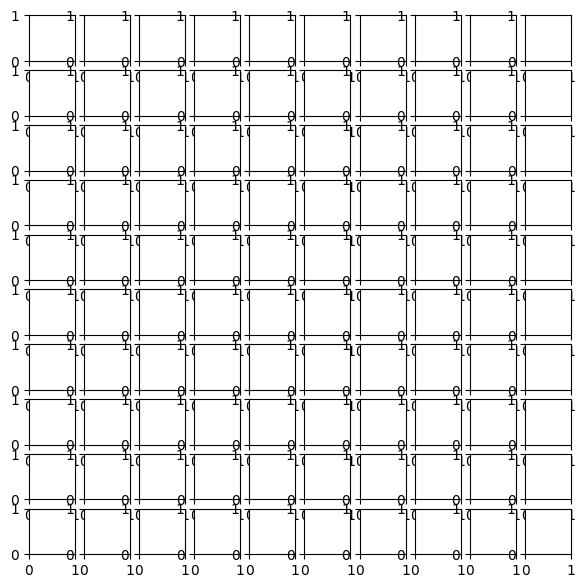

In [17]:
rand_vectors = torch.cat(rand_vectors).transpose(1,0).to(device)
fig, ax = plt.subplots(10,10,figsize=(7,7)); ax = iter(ax.flat)
for p in rand_vectors:
    img = model.decoder(p.reshape(1,64,2,2)).view(28,28)
    show(img, ax=next(ax))